# 배관 공사 플랫폼 설문 응답 분석 (주관식 문항)

In [1]:
# 파이썬 Library Load
import pandas as pd
import numpy as np
import PowerXlwings as px
from konlpy.tag._okt import Okt
import ckonlpy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl
# 한글 폰트 적용
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\SEOL\anaconda3\envs\ts\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
from konlpy.tag import Hannanum
from konlpy.tag import Twitter
from konlpy.tag import Kkma
hannanum=Hannanum()
twitter=Twitter()
kkma = Kkma()

C:\Users\SEOL\anaconda3\envs\ts\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [4]:
twitter.pos("여러분 안녕하십니까")

[('여러분', 'Noun'), ('안녕하십니까', 'Noun')]

In [5]:
# 파일 불러오기
excel_file=px.get()
print(excel_file)

C:/Users/SEOL/Desktop/PYJ/인강실습자료_파이썬_LDA.xlsx


# 설문 조사 자료 전처리 

## Data 구조 탐색 (전체)

In [7]:
df=px.setpd(wb=excel_file,sheet='설문결과정리',rng='A3',expand=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 96 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               45 non-null     float64
 1   이름                45 non-null     object 
 2   설문 송부             45 non-null     object 
 3   회신 여부             45 non-null     object 
 4   작성율               45 non-null     float64
 5   직급/직책             45 non-null     object 
 6   Dept.             45 non-null     object 
 7   Pjt               45 non-null     object 
 8   직무경력_FCM          2 non-null      object 
 9   직무경력_FCE          11 non-null     object 
 10  직무경력_SI           18 non-null     object 
 11  직무경력_SV           38 non-null     object 
 12  직무경력_기타           3 non-null      object 
 13  상품경력_산업           16 non-null     float64
 14  상품경력_환경           34 non-null     float64
 15  상품경력_화공           14 non-null     float64
 16  상품경력_기타           10 non-null     float64
 17 

In [9]:
df_basic=df.iloc[:,0:16]
df_basic.info()
df_basic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No.       45 non-null     float64
 1   이름        45 non-null     object 
 2   설문 송부     45 non-null     object 
 3   회신 여부     45 non-null     object 
 4   작성율       45 non-null     float64
 5   직급/직책     45 non-null     object 
 6   Dept.     45 non-null     object 
 7   Pjt       45 non-null     object 
 8   직무경력_FCM  2 non-null      object 
 9   직무경력_FCE  11 non-null     object 
 10  직무경력_SI   18 non-null     object 
 11  직무경력_SV   38 non-null     object 
 12  직무경력_기타   3 non-null      object 
 13  상품경력_산업   16 non-null     float64
 14  상품경력_환경   34 non-null     float64
 15  상품경력_화공   14 non-null     float64
dtypes: float64(5), object(11)
memory usage: 5.8+ KB


,No.,이름,설문 송부,회신 여부,작성율,직급/직책,Dept.,Pjt,직무경력_FCM,직무경력_FCE,직무경력_SI,직무경력_SV,직무경력_기타,상품경력_산업,상품경력_환경,상품경력_화공
0,2.0,서영민,최초,O,0.810127,SI,산업,평택 Linde ASU,None,None,5~10년,None,None,4.0,NaN,10.0
1,12.0,방기동,최초,O,0.936709,SV,산업,탕정 A2/A3 PJT,None,None,None,5~10년,None,8.0,NaN,NaN
2,15.0,유형찬,최초,O,1.000000,SV,산업,탕정 C-PJT,None,5년 미만,None,5~10년,None,11.0,NaN,NaN
3,23.0,홍성민,최초,O,0.873418,SV,산업,중국 천진법인 제2공장 증설공사,None,None,None,5~10년,None,6.0,NaN,NaN
4,26.0,김동경,최초,O,0.835443,SI,산업,헝가리 SDI,None,None,5~10년,10~15년,None,22.0,3.0,NaN


In [10]:
df_basic=df_basic.drop('No.',axis=1)
df_basic.tail()

,이름,설문 송부,회신 여부,작성율,직급/직책,Dept.,Pjt,직무경력_FCM,직무경력_FCE,직무경력_SI,직무경력_SV,직무경력_기타,상품경력_산업,상품경력_환경,상품경력_화공
40,이석준,추가,O,0.291139,SV,환경,전자 P2-PJT 초순수,None,None,5년 미만,5~10년,None,NaN,2.0,12.0
41,이승철,추가,O,0.329114,SV,환경,전자 P2-PJT 초순수,None,None,None,5~10년,None,NaN,5.0,NaN
42,장덕진,추가,O,0.291139,SV,환경,전자 P2-PJT 초순수,None,None,None,5년 미만,None,NaN,1.5,NaN
43,조재영,추가,O,0.189873,SV,환경,전자 P2-PJT 초순수,None,None,None,5~10년,None,NaN,9.6,NaN
44,천상진,추가,O,0.924051,SI,산업,헝가리 SDI,None,None,5년 미만,20년 이상,None,5.0,NaN,6.0


In [11]:
df_approval=df.loc[:,['자재승인요청_필요',"자재승인요청_필요항목","자재승인요청_가능성","자재승인요청_가능성이유"]]

In [12]:
df_approval.head()

,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
0,4.0,현재 자재구매는 업체에서 수행 합니다.,4.0,현재 자재구매는 업체에서 수행 합니다.
1,3.0,"자료 업로드하여 문서관리, 필요시 즉시 열람",3.0,"외부 승인자(감리, 발주처)가 시스템 접근이 되어야 효과 발생, 안될 경우 내부 시..."
2,5.0,자재승인업무 중 결재라인 자동화필요,5.0,방대한 자료 및 복잡한 결재절차
3,5.0,여러 품목에 대한 서류 작성에 시간이 소모됨,3.0,시스템 구축이 안되있음 (Data 확보 필요)
4,4.0,승인서류,3.0,자재승인의 절차상 공사업체 자료제출-> SECL 검토 -> 발주처 승인요청으로 자동...


## 시각화 : 자재 승인 요청 

### 데이터 사전처리

In [13]:
df_approval=pd.concat([df_basic,df_approval],axis=1)

In [14]:
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   이름            45 non-null     object 
 1   설문 송부         45 non-null     object 
 2   회신 여부         45 non-null     object 
 3   작성율           45 non-null     float64
 4   직급/직책         45 non-null     object 
 5   Dept.         45 non-null     object 
 6   Pjt           45 non-null     object 
 7   직무경력_FCM      2 non-null      object 
 8   직무경력_FCE      11 non-null     object 
 9   직무경력_SI       18 non-null     object 
 10  직무경력_SV       38 non-null     object 
 11  직무경력_기타       3 non-null      object 
 12  상품경력_산업       16 non-null     float64
 13  상품경력_환경       34 non-null     float64
 14  상품경력_화공       14 non-null     float64
 15  자재승인요청_필요     32 non-null     float64
 16  자재승인요청_필요항목   29 non-null     object 
 17  자재승인요청_가능성    30 non-null     float64
 18  자재승인요청_가능성이유  30 non-null     ob

In [15]:
df_approval.head()

,이름,설문 송부,회신 여부,작성율,직급/직책,Dept.,Pjt,직무경력_FCM,직무경력_FCE,직무경력_SI,직무경력_SV,직무경력_기타,상품경력_산업,상품경력_환경,상품경력_화공,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
0,서영민,최초,O,0.810127,SI,산업,평택 Linde ASU,None,None,5~10년,None,None,4.0,NaN,10.0,4.0,현재 자재구매는 업체에서 수행 합니다.,4.0,현재 자재구매는 업체에서 수행 합니다.
1,방기동,최초,O,0.936709,SV,산업,탕정 A2/A3 PJT,None,None,None,5~10년,None,8.0,NaN,NaN,3.0,"자료 업로드하여 문서관리, 필요시 즉시 열람",3.0,"외부 승인자(감리, 발주처)가 시스템 접근이 되어야 효과 발생, 안될 경우 내부 시..."
2,유형찬,최초,O,1.000000,SV,산업,탕정 C-PJT,None,5년 미만,None,5~10년,None,11.0,NaN,NaN,5.0,자재승인업무 중 결재라인 자동화필요,5.0,방대한 자료 및 복잡한 결재절차
3,홍성민,최초,O,0.873418,SV,산업,중국 천진법인 제2공장 증설공사,None,None,None,5~10년,None,6.0,NaN,NaN,5.0,여러 품목에 대한 서류 작성에 시간이 소모됨,3.0,시스템 구축이 안되있음 (Data 확보 필요)
4,김동경,최초,O,0.835443,SI,산업,헝가리 SDI,None,None,5~10년,10~15년,None,22.0,3.0,NaN,4.0,승인서류,3.0,자재승인의 절차상 공사업체 자료제출-> SECL 검토 -> 발주처 승인요청으로 자동...


In [16]:
df_approval_filtered1=df_approval.loc[ df['자재승인요청_필요'].notnull(), ['직급/직책','자재승인요청_필요',"자재승인요청_필요항목","자재승인요청_가능성","자재승인요청_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"자재승인요청_필요":"int64"})

In [17]:
df_approval_filtered2=df_approval.loc[ df['자재승인요청_가능성'].notnull(), ['직급/직책','자재승인요청_필요',"자재승인요청_필요항목","자재승인요청_가능성","자재승인요청_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"자재승인요청_가능성":"int64"})

## 시각화 : 자재 승인 요청 업무 설문 결과 

<AxesSubplot:xlabel='count', ylabel='자재승인요청_가능성'>

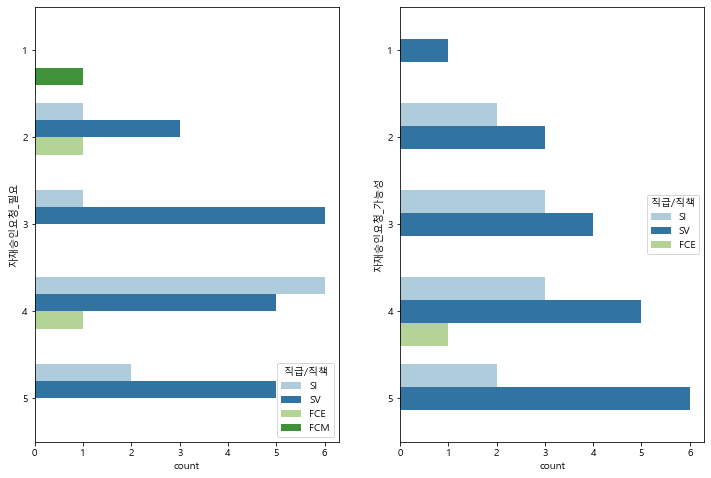

In [16]:
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='자재승인요청_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='자재승인요청_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

## 설문 문항 작성 분석 - 필요시 LDA 혹은 word cloud 적용

In [17]:
# 1~5점 까지 어떤 응답을 하였는가 분석
# 자료가 한두개인 경우 LDA 미적용 
# 응답횟수가 여러개인 경우 LDA로 Topic이 뭔지 추출 

### 자재 승인 요청 필요성 - 1점

In [18]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==1]

,직급/직책,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
29,FCM,1,None,NaN,None


### 자재 승인 요청 필요성 - 2점

In [19]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==2,["자재승인요청_필요항목"]]

,자재승인요청_필요항목
5,VP를 PDF로 접수. 추후 필요시 시스템 조회. 서지보관 불필요
17,딱히 없음.
21,"동일 지역,사업별로 승인 완료 된 자재승인원이 시스템에 업로드 되었으면 좋겠다.\n..."
22,None
34,None


In [20]:
px.to_excel(data=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==2,["자재승인요청_필요항목"]],rng="A1")

<Sheet [통합 문서4]Sheet1>

### 자재 승인 요청 필요성 - 3점

In [21]:
df_app_need_text3=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==3,["자재승인요청_필요항목"]]

In [22]:
df_app_need_text3


,자재승인요청_필요항목
1,"자료 업로드하여 문서관리, 필요시 즉시 열람"
8,BIM 도면에서 물량 추출 자동화
14,전 현장 기승인자재 확인/즉시 적용 가능하도록 DB 구축
15,전 현장 기승인자재 확인/즉시 적용 가능하도록 DB 구축
24,기존 PJT에 사용한 자재 승인 자동화
40,입고 관련 서류
43,설계와 연동 자재구매


In [ ]:
# twitter.pos("자료 업로드하여 문서관리, 필요시 즉시 열람")

### 자재 승인 요청 필요성 - 4점

In [23]:
df_app_need_text4=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==4,["자재승인요청_필요항목"]]

In [ ]:
del df_app_need_text4

In [24]:
df_app_need_text4

,자재승인요청_필요항목
0,현재 자재구매는 업체에서 수행 합니다.
4,승인서류
6,승인 관련 서류 와 VP Upload한것이 있으면 좋겠다
9,승인이 누락되는 일이 없도록 알람이나 체크시트 등이 포함되면 좋겠다.
13,DB 구축하여 승인서류 자동 제출
16,전 현장 기승인자재 확인/즉시 적용 가능하도록 DB 구축
23,"자재 공급원 승인 : 수많은 현장에서 자재 승인 서류를 올리는데, 각 현장에서 따로..."
27,"자재승인원 서류 작성 (BM, CQI목록 취합, 관련도면, VP 等 관련자료 자동연결)"
33,旣사용되고 있는 자재 및 동일품목 자재에 대한 Data Base化 구축
36,"ERP, Material Code별 재고 파악 등 적용"


In [26]:
words=px.LToS(df_app_need_text4['자재승인요청_필요항목'].tolist())
t=twitter.pos(words)

In [25]:
px.to_excel(data=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==4,["자재승인요청_필요항목"]],rng="A1")

<Sheet [통합 문서5]Sheet1>

In [27]:
textlist=[]
for i in range(len(t)):
    if t[i][1]== "Noun" or t[i][1]=="Alpha":
        textlist.append(t[i][0])
        


In [28]:
textlist

['현재',
 '자재',
 '구매',
 '업체',
 '수행',
 '승인',
 '서류',
 '승인',
 '관련',
 '서류',
 'VP',
 'Upload',
 '것',
 '승인',
 '누락',
 '알람',
 '체크',
 '시트',
 '등',
 '포함',
 'DB',
 '구축',
 '승인',
 '서류',
 '자동',
 '제출',
 '전',
 '현장',
 '기승',
 '자재',
 '확인',
 '즉시',
 '적용',
 'DB',
 '구축',
 '자재',
 '공급원',
 '승인',
 '현장',
 '자재',
 '승인',
 '서류',
 '각',
 '현장',
 'Vendor',
 '연락',
 '필요',
 '서류',
 '접수',
 '본사',
 '차원',
 '대형',
 'Vendor',
 '철골',
 '배관',
 '덕트',
 '케이블',
 '밸브',
 '펌프',
 '등',
 '의',
 '각종',
 '서류',
 '카달',
 '로그',
 '지방세',
 '국세',
 '납부',
 '확인',
 '공장',
 '등록증',
 '각종',
 '시험',
 '성적',
 '를',
 '시스템',
 '업로드',
 '현장',
 '담당',
 '추출',
 '수',
 '해당',
 '업무',
 '주로',
 '협력',
 '사',
 '수행',
 '서류',
 '미비',
 '시',
 'SECL',
 '담당',
 'Vendor',
 '직접',
 '연락',
 '경우',
 '자재',
 '검사',
 '종별',
 '현장',
 '별',
 '자재',
 '검품',
 '위치',
 '시스템',
 '협력',
 '사가',
 '자재',
 '검사',
 '신청',
 '감리',
 'secl',
 '담당',
 '자동',
 '연락',
 '검사',
 '것',
 '지금',
 '자재',
 '때',
 '감리',
 '약속',
 '정해',
 '검수',
 '자재',
 '승인',
 '서류',
 '작성',
 'BM',
 'CQI',
 '목록',
 '취합',
 '관련',
 '도면',
 'VP',
 '관련',
 '자료',
 '자동',
 '연결',
 '사용',
 '자재'

In [30]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [31]:
noun_doc = ' '.join(textlist)
noun_doc = noun_doc.strip()

#### 워드 클라우드

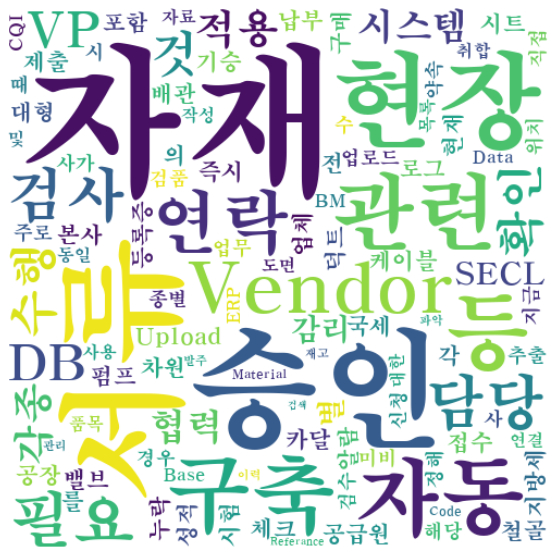

In [32]:
font_path="C:/Windows/Fonts/H2MJRE.TTF"  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
sentences=df_app_need_text4["자재승인요청_필요항목"].tolist()
len(sentences)

12

In [37]:
# 명사와 영어단어 추가하기 
textlist=[]
line_list=[]
for sentence in sentences:
    textlist=[]
    t=twitter.pos(sentence)
    for i in range(len(t)):
        if t[i][1]== "Noun" or t[i][1]=="Alpha":
            textlist.append(t[i][0])
    line_list.append(textlist)
        

#### LDA 결과

In [38]:
import gensim
from gensim import corpora
import logging
logging.basicConfig(level=logging.DEBUG)
topic = 5
keyword = 10
texts = []
resultList = []
stop_list = ["별","등","의"]
for line in line_list:
    words = line
    if words != [""]:
        tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
        texts.append(tokens)
dictionary = corpora.Dictionary(texts)    
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=5)
for num in range(topic):
    resultList.append(ldamodel.show_topic(num, keyword))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(96 unique tokens: ['구매', '수행', '업체', '자재', '현재']...) from 12 documents (total 151 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 5 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-7.413 per-word bound, 170.4 perplexity estimate based on a held-out corpus of 12 documents with 151 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #12/12
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 12 doc

In [39]:
topic1=[resultList[0][i][0] for i in range(0,keyword)]
topic2=[resultList[1][i][0] for i in range(0,keyword)]
topic3=[resultList[2][i][0] for i in range(0,keyword)]
topic4=[resultList[3][i][0] for i in range(0,keyword)]
topic5=[resultList[4][i][0] for i in range(0,keyword)]

In [40]:
df_topic=pd.DataFrame(data={'topic1':topic1,'topic2':topic2,"topic3":topic3,"topic4":topic4,"topic5":topic5})

In [41]:
df_topic

,topic1,topic2,topic3,topic4,topic5
0,구축,자재,승인,관련,수행
1,DB,서류,Material,VP,구매
2,자재,승인,알람,서류,현재
3,서류,현장,누락,승인,업체
4,승인,필요,파악,자재,자재
5,현장,연락,체크,자동,승인
6,자동,Vendor,ERP,BM,서류
7,확인,담당,Code,자료,발주
8,적용,검사,재고,목록,구축
9,기승,협력,적용,작성,VP


###  자재 승인 요청 필요성 - 5점

In [42]:
df_app_need_text=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_필요']==5,["자재승인요청_필요항목"]]

print(df_app_need_text.shape)
df_app_need_text

(7, 1)


,자재승인요청_필요항목
2,자재승인업무 중 결재라인 자동화필요
3,여러 품목에 대한 서류 작성에 시간이 소모됨
7,"승인관련서류(사업자등록증, 공장등록증 외), VP"
25,서류 및 VP Upload 자동화
26,서류 및 VP Upload
28,진행형황 수시 확인가능 및 관련자 모두 확인이 용이
35,서류 및 VP Upload 자동화


### 자재 승인 요청 시스템/자동화 가능성 - 1점

In [43]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==1]

,직급/직책,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
40,SV,3,입고 관련 서류,1.0,자재의 대부분이 발주처가 지급함


### 자재 승인 요청 시스템/자동화 가능성 - 2점

In [44]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==2]

,직급/직책,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
5,SV,2,VP를 PDF로 접수. 추후 필요시 시스템 조회. 서지보관 불필요,2.0,신 시스템을 위한 투자비용이 더 크다 생각함.
17,SV,2,딱히 없음.,2.0,"지급자재 CM단, 발주처 담당자에 따라 미세하게 달라지는 프로시져로, 당사에서 시스..."
21,SI,2,"동일 지역,사업별로 승인 완료 된 자재승인원이 시스템에 업로드 되었으면 좋겠다.\n...",2.0,사업주에서도 같은 SYSTEM을 사용 해야 하는 문제점이 있음.\n자재승인품목마다 ...
22,SV,2,None,2.0,"자재 승인 첨부 서류가 많고, 하나하나 스캔해서 시스템에 올리는게 더 비효율적임"
24,SI,3,기존 PJT에 사용한 자재 승인 자동화,2.0,기자재 부분은 PJT 마다 다르므로 어렵다


In [45]:
df_app_why_text=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==2,["자재승인요청_가능성이유"]]

In [46]:
df_app_why_text

,자재승인요청_가능성이유
5,신 시스템을 위한 투자비용이 더 크다 생각함.
17,"지급자재 CM단, 발주처 담당자에 따라 미세하게 달라지는 프로시져로, 당사에서 시스..."
21,사업주에서도 같은 SYSTEM을 사용 해야 하는 문제점이 있음.\n자재승인품목마다 ...
22,"자재 승인 첨부 서류가 많고, 하나하나 스캔해서 시스템에 올리는게 더 비효율적임"
24,기자재 부분은 PJT 마다 다르므로 어렵다


In [47]:
px.to_excel(data=df_app_why_text)

DEBUG:comtypes:Release <POINTER(IDispatch) ptr=0x1e7e71e9008 at 1e7e85e4a40>


<Sheet [통합 문서6]Sheet1>

#### 워드 클라우드

In [48]:
words=px.LToS(df_app_why_text["자재승인요청_가능성이유"].tolist())
t=twitter.pos(words)

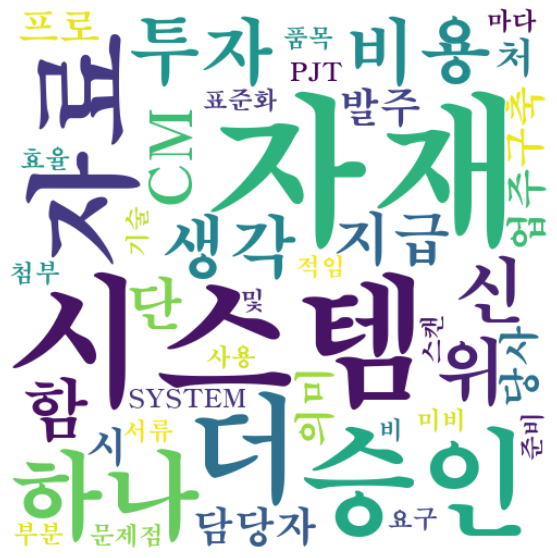

In [49]:
textlist=[]
for i in range(len(t)):
    if t[i][1]== "Noun" or t[i][1]=="Alpha":
        textlist.append(t[i][0])
noun_doc = ' '.join(textlist)
noun_doc = noun_doc.strip()
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#### LDA

In [50]:
sentences=df_app_why_text["자재승인요청_가능성이유"].tolist()

In [51]:
# 명사와 영어단어 추가하기 
textlist=[]
line_list=[]
for sentence in sentences:
    textlist=[]
    t=twitter.pos(sentence)
    for i in range(len(t)):
        if t[i][1]== "Noun" or t[i][1]=="Alpha":
            textlist.append(t[i][0])
    line_list.append(textlist)

topic = 2
keyword = 5
texts = []
resultList = []
stop_list = ["별","등","의"]
for line in line_list:
    words = line
    if words != [""]:
        tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
        texts.append(tokens)
dictionary = corpora.Dictionary(texts)    
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=5)
for num in range(topic):
    resultList.append(ldamodel.show_topic(num, keyword))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(34 unique tokens: ['비용', '생각', '시스템', '투자', 'CM']...) from 5 documents (total 42 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 0.5
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 2 topics, 5 passes over the supplied corpus of 5 documents, updating model once every 5 documents, evaluating perplexity every 5 documents, iterating 50x with a convergence threshold of 0.001000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.470 per-word bound, 22.2 perplexity estimate based on a held-out corpus of 5 documents with 42 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #5/5
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 5 documents
DEB

In [52]:
topic1=[resultList[0][i][0] for i in range(0,keyword)]
topic2=[resultList[1][i][0] for i in range(0,keyword)]
# topic3=[resultList[2][i][0] for i in range(0,keyword)]
# topic4=[resultList[3][i][0] for i in range(0,keyword)]
# topic5=[resultList[4][i][0] for i in range(0,keyword)]

In [53]:
topic1
print(topic2)

['자재', '하나', '승인', '자료', '시스템']


### 자재 승인 요청 시스템/자동화 가능성 - 3점

In [54]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==3]

,직급/직책,자재승인요청_필요,자재승인요청_필요항목,자재승인요청_가능성,자재승인요청_가능성이유
1,SV,3,"자료 업로드하여 문서관리, 필요시 즉시 열람",3.0,"외부 승인자(감리, 발주처)가 시스템 접근이 되어야 효과 발생, 안될 경우 내부 시..."
3,SV,5,여러 품목에 대한 서류 작성에 시간이 소모됨,3.0,시스템 구축이 안되있음 (Data 확보 필요)
4,SI,4,승인서류,3.0,자재승인의 절차상 공사업체 자료제출-> SECL 검토 -> 발주처 승인요청으로 자동...
8,SV,3,BIM 도면에서 물량 추출 자동화,3.0,"단납기 공사에서 도면출도가 늦고, 자주 Rev.되어 정합성이 떨어질 것"
33,SV,4,旣사용되고 있는 자재 및 동일품목 자재에 대한 Data Base化 구축,3.0,방대한 자료에 대한 Data Base 구축에 장기간 시간투자 필요
36,SI,4,"ERP, Material Code별 재고 파악 등 적용",3.0,프로젝트별 배관재 아이템이 다양해서 표준화 어려움
38,SI,4,자재 발주,3.0,절차


In [55]:
df_app_why_text=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==3,["자재승인요청_가능성이유"]]
df_app_why_text

,자재승인요청_가능성이유
1,"외부 승인자(감리, 발주처)가 시스템 접근이 되어야 효과 발생, 안될 경우 내부 시..."
3,시스템 구축이 안되있음 (Data 확보 필요)
4,자재승인의 절차상 공사업체 자료제출-> SECL 검토 -> 발주처 승인요청으로 자동...
8,"단납기 공사에서 도면출도가 늦고, 자주 Rev.되어 정합성이 떨어질 것"
33,방대한 자료에 대한 Data Base 구축에 장기간 시간투자 필요
36,프로젝트별 배관재 아이템이 다양해서 표준화 어려움
38,절차


In [56]:
px.to_excel(data=df_app_why_text)

DEBUG:comtypes:Release <POINTER(IDispatch) ptr=0x1e7e71e8f28 at 1e7e5f2f940>


<Sheet [통합 문서7]Sheet1>

#### 워드 클라우드

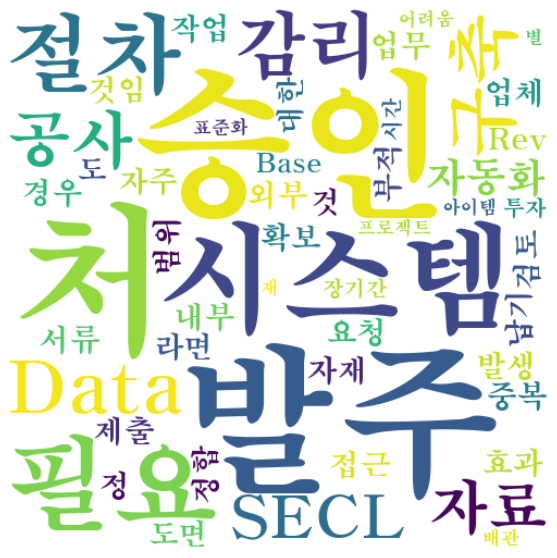

In [57]:
words=px.LToS(df_app_why_text["자재승인요청_가능성이유"].tolist())
t=twitter.pos(words)
textlist=[]
for i in range(len(t)):
    if t[i][1]== "Noun" or t[i][1]=="Alpha":
        textlist.append(t[i][0])
noun_doc = ' '.join(textlist)
noun_doc = noun_doc.strip()
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#### LDA

In [58]:
sentences=df_app_why_text["자재승인요청_가능성이유"].tolist()
textlist=[]
line_list=[]
for sentence in sentences:
    textlist=[]
    t=twitter.pos(sentence)
    for i in range(len(t)):
        if t[i][1]== "Noun" or t[i][1]=="Alpha":
            textlist.append(t[i][0])
    line_list.append(textlist)

topic = 5
keyword = 10
texts = []
resultList = []
stop_list = ["별","등","의"]
for line in line_list:
    words = line
    if words != [""]:
        tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
        texts.append(tokens)
dictionary = corpora.Dictionary(texts)    
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=5)
for num in range(topic):
    resultList.append(ldamodel.show_topic(num, keyword))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(47 unique tokens: ['감리', '경우', '내부', '발생', '발주']...) from 7 documents (total 64 corpus positions)
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 5 topics, 5 passes over the supplied corpus of 7 documents, updating model once every 7 documents, evaluating perplexity every 7 documents, iterating 50x with a convergence threshold of 0.001000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-7.069 per-word bound, 134.3 perplexity estimate based on a held-out corpus of 7 documents with 64 words
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #7/7
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 7 documents
DEB

In [59]:
topic1=[resultList[0][i][0] for i in range(0,keyword)]
topic2=[resultList[1][i][0] for i in range(0,keyword)]
topic3=[resultList[2][i][0] for i in range(0,keyword)]
topic4=[resultList[3][i][0] for i in range(0,keyword)]
topic5=[resultList[4][i][0] for i in range(0,keyword)]

In [60]:
df_topic=pd.DataFrame(data={'topic1':topic1,'topic2':topic2,"topic3":topic3,"topic4":topic4,"topic5":topic5})
# df_topic=pd.DataFrame(data={'topic1':topic1,'topic2':topic2,"topic3":topic3})
df_topic

,topic1,topic2,topic3,topic4,topic5
0,절차,필요,배관,절차,시스템
1,공사,Data,어려움,구축,발주
2,자동화,구축,아이템,시스템,감리
3,승인,자료,표준화,필요,경우
4,SECL,투자,프로젝트,프로젝트,서류
5,Rev,시간,SECL,정합,작업
6,정합,장기간,승인,표준화,업무
7,자주,Base,절차,Data,접근
8,납기,대한,자동화,자주,효과
9,도면,확보,자재,납기,내부


### 자재 승인 요청 시스템/자동화 가능성 - 4점

In [61]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==4]
df_app_why_text=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==4,["자재승인요청_가능성이유"]]
df_app_why_text

,자재승인요청_가능성이유
0,현재 자재구매는 업체에서 수행 합니다.
6,자재 사양이 KS 규격은 일정하고 변하지 않음
9,자주 사용하는 자재 등이 정해져있어 표준화가 가능하다고 생각한다.
13,기 승인된 현장별 DB 구축해놓으면 될 것 같다.
14,기존 현장별 DB 취합만 하면 될 듯
15,기존 현장별 DB 취합만 하면 될 듯
27,"자재승인 서류는 발주처별 표준화 양식 존재, 관련자료 Digital 化 가능"
43,None
44,관련자료 첨부해서 결재 시스템으로 승인 요청하면 가능함.


In [62]:
px.to_excel(data=df_app_why_text,rng="A1")

DEBUG:comtypes:Release <POINTER(IDispatch) ptr=0x1e7e71e9078 at 1e7e85e4d40>


<Sheet [통합 문서8]Sheet1>

### 자재 승인 요청 시스템/자동화 가능성 - 5점

In [63]:
df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==5]
df_app_why_text=df_approval_filtered1.loc[df_approval_filtered1['자재승인요청_가능성']==5,["자재승인요청_가능성이유"]]
df_app_why_text

,자재승인요청_가능성이유
2,방대한 자료 및 복잡한 결재절차
7,전자 PJT의 경우 기존 승인자재 동일자재 승인이 대부분
16,기존 현장별 DB 취합만 하면 될 듯
23,반복성 업무이지만 시스템화가 어려울 것 같지는 않음
25,pjt시 마다 똑같은 서류요청 및 자료작성 반복
26,pjt시마다 매번 똑같은 서류요청 및 자료작성 반복
28,자재는 업부 특히 공사 진행에 있어 매우 중요하며 공정 일정에 상당히 중요합니다.
35,pjt시 마다 똑같은 서류요청 및 자료작성 반복


## 시각화 : 공정회의

In [64]:
df_approval=df.loc[:,['공정회의_필요',"공정회의_필요항목","공정회의_가능성","공정회의_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   이름          45 non-null     object 
 1   설문 송부       45 non-null     object 
 2   회신 여부       45 non-null     object 
 3   작성율         45 non-null     float64
 4   직급/직책       45 non-null     object 
 5   Dept.       45 non-null     object 
 6   Pjt         45 non-null     object 
 7   직무경력_FCM    2 non-null      object 
 8   직무경력_FCE    11 non-null     object 
 9   직무경력_SI     18 non-null     object 
 10  직무경력_SV     38 non-null     object 
 11  직무경력_기타     3 non-null      object 
 12  상품경력_산업     16 non-null     float64
 13  상품경력_환경     34 non-null     float64
 14  상품경력_화공     14 non-null     float64
 15  공정회의_필요     34 non-null     float64
 16  공정회의_필요항목   29 non-null     object 
 17  공정회의_가능성    34 non-null     float64
 18  공정회의_가능성이유  31 non-null     object 
dtypes: float64(6), object(13)
memor

In [65]:
df_approval.head()

,이름,설문 송부,회신 여부,작성율,직급/직책,Dept.,Pjt,직무경력_FCM,직무경력_FCE,직무경력_SI,직무경력_SV,직무경력_기타,상품경력_산업,상품경력_환경,상품경력_화공,공정회의_필요,공정회의_필요항목,공정회의_가능성,공정회의_가능성이유
0,서영민,최초,O,0.810127,SI,산업,평택 Linde ASU,None,None,5~10년,None,None,4.0,NaN,10.0,3.0,보고자의 중요사항에 맞춰 작성 필요함 / 불필요,4.0,일일보고 기준으로 작업 가능하다 판단 합니다.
1,방기동,최초,O,0.936709,SV,산업,탕정 A2/A3 PJT,None,None,None,5~10년,None,8.0,NaN,NaN,4.0,진척율 일/주/월 단위 자동 산출(공정률 관리),4.0,"공기 지연/단축 등 즉시 인지 및 대응, 보고자료의 정합성 향상, 취합시간 단축"
2,유형찬,최초,O,1.000000,SV,산업,탕정 C-PJT,None,5년 미만,None,5~10년,None,11.0,NaN,NaN,5.0,공종별 대표 Item별 진척률 자동취합,5.0,공종별 회의자료 취합에 회의준비 시간이 대부분 소요됨
3,홍성민,최초,O,0.873418,SV,산업,중국 천진법인 제2공장 증설공사,None,None,None,5~10년,None,6.0,NaN,NaN,4.0,통일화된 양식을 기반으로하여금 담당자가 System 입력시 자동산출 및 자료화가 도...,3.0,표준화 미비 및 시스템 미구축
4,김동경,최초,O,0.835443,SI,산업,헝가리 SDI,None,None,5~10년,10~15년,None,22.0,3.0,NaN,4.0,동일한 포맷으로 취합,3.0,현장별 동일한 양식활용 가능성 여부 불투명


In [66]:
df_approval_filtered1=df_approval.loc[ df['공정회의_필요'].notnull(), 
                                      ['직급/직책','공정회의_필요',"공정회의_필요항목","공정회의_가능성","공정회의_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"공정회의_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['공정회의_가능성'].notnull(), 
                                      ['직급/직책','공정회의_필요',"공정회의_필요항목","공정회의_가능성","공정회의_가능성이유"] ]
df_approval_filtered2=df_approval_filtered1.astype({"공정회의_가능성":"int64"})

<AxesSubplot:xlabel='count', ylabel='공정회의_가능성'>

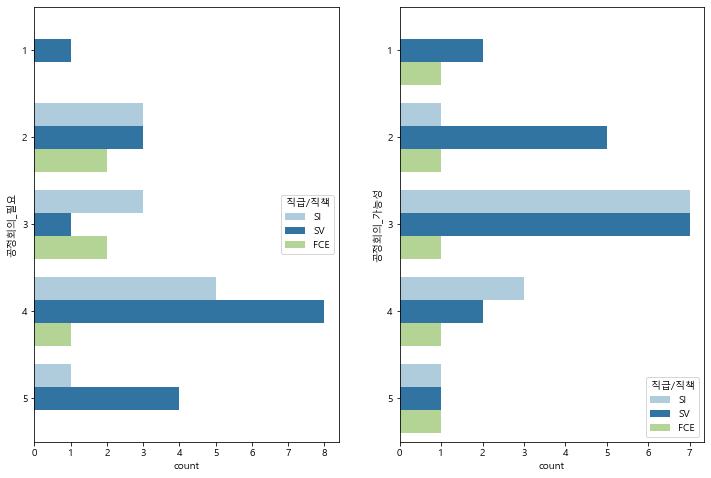

In [67]:
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='공정회의_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='공정회의_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### 공정회의 필요성 - 1점

In [68]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_필요']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['공정회의_필요']==1,["공정회의_필요항목"]]
df_meet_need_text['공정회의_필요항목'].tolist()

['지금까지 수 없이 시도해 왔지만 비용 낭비만 있었을 뿐.. ']

### 공정회의 필요성 - 2점

In [69]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_필요']==2]

,직급/직책,공정회의_필요,공정회의_필요항목,공정회의_가능성,공정회의_가능성이유
5,SV,2,이 내용은 자동화가 될 수 없는 부분이라 생각합니다.,1.0,각 공종에서 업데이트. 총괄 부서에서 취합이 옳다고 생각합니다.
7,SI,2,공정회의 Agenda 수시 변경,3.0,공정회의 Agenda 수시 변경
10,FCE,2,공정률 및 Area별 공사진행현황 등을 자동화를 통해 누구나 열람 가능할 수 있으면...,4.0,시스템 기반 각 공종별 해당 공정진행율 입력 및 관리한다면 취합부서에서 별도 보고서...
17,SV,2,딱히 없음.,2.0,"보고되어야 할 내용에 따라 양식을 자주 바꿔야하고, 소장님 지시사항에 의해 자료를 ..."
21,SI,2,기존 CM TOOL을 산업환경에 맞게 변형하여 사용 가능하다고 봄,2.0,기존 CM TOOL을 산업환경에 맞게 변형하여 사용 가능하다고 봄
22,SV,2,None,2.0,프로젝트마다 정해져있는 양식에 매주 달라지는 내용 작성. 각 소장별로 보고싶은 포인...
24,SI,2,None,3.0,현장은 수시로 변하고 issue에 적응가능성 어려움
39,FCE,2,None,1.0,None


### 공정회의 필요성 - 3점

In [70]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_필요']==3]

,직급/직책,공정회의_필요,공정회의_필요항목,공정회의_가능성,공정회의_가능성이유
0,SI,3,보고자의 중요사항에 맞춰 작성 필요함 / 불필요,4.0,일일보고 기준으로 작업 가능하다 판단 합니다.
23,SV,3,"자동화 보다는 표준 템플릿 작성이 시급해 보임. \n현장마다, 공정마다 공정율 표시...",3.0,숫자가 아닌 도식화된 공정율 자료 작성은 어차피 사람이 데이터를 입력해야 하는 것 같음
28,SI,3,None,3.0,None
34,FCE,3,None,2.0,발주처에 요청하는 자료가 가변적임.
37,FCE,3,None,3.0,None
38,SI,3,공정율 작성,3.0,표준화 미비


### 공정회의 필요성 - 4점

In [71]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_필요']==4]

,직급/직책,공정회의_필요,공정회의_필요항목,공정회의_가능성,공정회의_가능성이유
1,SV,4,진척율 일/주/월 단위 자동 산출(공정률 관리),4.0,"공기 지연/단축 등 즉시 인지 및 대응, 보고자료의 정합성 향상, 취합시간 단축"
3,SV,4,통일화된 양식을 기반으로하여금 담당자가 System 입력시 자동산출 및 자료화가 도...,3.0,표준화 미비 및 시스템 미구축
4,SI,4,동일한 포맷으로 취합,3.0,현장별 동일한 양식활용 가능성 여부 불투명
9,SV,4,최초 계획한 공정률과 작업내용이 자동으로 작성되면 좋겠다.,4.0,최초 Data를 잘 입력하면 매주 만들어야 할 자료는 자동화가 가능할 것 같다.
12,SI,4,양식,4.0,자료의 표준화로 데이터 수집 및 활용
13,SV,4,"양식통일, 공정율 기준 일원화",2.0,현장별 발주처 요구사항 반영 어려움
25,SV,4,공정율 작성,3.0,상품별 상이
26,SV,4,공정율 작성,3.0,상품별 상이
27,FCE,4,"일일 자재입고실적, 일일 설치실적, 실적 공정 자동변환",5.0,"전자 일일결산, 당 사 S-HUB等 Work Done에 대한 일~주"
30,SI,4,"전전주, 전주 내용은 자동입력되도록 (전주 보고자료이므로)",3.0,보고 받는 사람들의 특성 차이


In [72]:
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['공정회의_필요']==4,["공정회의_필요항목"]]
df_meet_need_text['공정회의_필요항목'].tolist()

['진척율 일/주/월 단위 자동 산출(공정률 관리)',
 '통일화된 양식을 기반으로하여금 담당자가 System 입력시 자동산출 및 자료화가 도출되길 희망함',
 '동일한 포맷으로 취합',
 '최초 계획한 공정률과 작업내용이 자동으로 작성되면 좋겠다.',
 '양식',
 '양식통일, 공정율 기준 일원화',
 '공정율 작성',
 '공정율 작성',
 '일일 자재입고실적, 일일 설치실적, 실적 공정 자동변환',
 '전전주, 전주 내용은 자동입력되도록 (전주 보고자료이므로)',
 'P6 프로그램과 연동된 공정률 산정 자동화',
 '공정율 작성',
 '회의자료는 프로그램에 기입하면 자동정리되고 대면회의는 최소화',
 '양식을 정형화 하고, 프로그래스 및 시공사진만 업데이트 하면 좋겠습니다.']

### 공정회의 필요성 - 5점

In [73]:
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['공정회의_필요']==5,["공정회의_필요항목"]]
df_meet_need_text['공정회의_필요항목'].tolist()

['공종별 대표 Item별 진척률 자동취합',
 '각 공정 진척률이 자동취합되었으면 좋고 마스터스케줄과 연계되어서 정상적으로 공정률이 가고 있는지 확인하는 시스템이 적용 되어 있으면 현장에서 추측으로 판단하는것 보다는 현실감이 더 좋을수 있다.',
 '양식통일, 공정율 기준 일원화',
 '양식통일, 공정율 기준 일원화',
 '양식통일, 공정율 기준 일원화']

### 공정회의 가능성 - 1점

In [74]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==1]


,직급/직책,공정회의_필요,공정회의_필요항목,공정회의_가능성,공정회의_가능성이유
5,SV,2,이 내용은 자동화가 될 수 없는 부분이라 생각합니다.,1.0,각 공종에서 업데이트. 총괄 부서에서 취합이 옳다고 생각합니다.
8,SV,1,지금까지 수 없이 시도해 왔지만 비용 낭비만 있었을 뿐..,1.0,발주처마다 요구하는 자료가 다른데 어떻게 획일화된 시스템으로 일을 할 수 있을지 의문이다
39,FCE,2,None,1.0,None


### 공정회의 가능성 - 2점

In [75]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==2,["공정회의_가능성이유"]]
df_meet_need_text['공정회의_가능성이유'].tolist()

['현장별 발주처 요구사항 반영 어려움',
 '현장별 발주처 요구사항 반영 어려움',
 '현장별 발주처 요구사항 반영 어려움',
 '보고되어야 할 내용에 따라 양식을 자주 바꿔야하고, 소장님 지시사항에 의해 자료를 사람이 계속 변경해야함',
 '기존 CM TOOL을 산업환경에 맞게 변형하여 사용 가능하다고 봄',
 '프로젝트마다 정해져있는 양식에 매주 달라지는 내용 작성. 각 소장별로 보고싶은 포인트가 다르기때문에 양식 표준화해도 내용은 달라질것임',
 '발주처에 요청하는 자료가 가변적임.']

### 공정회의 가능성 - 3점

In [76]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==3,["공정회의_가능성이유"]]
df_meet_need_text['공정회의_가능성이유'].tolist()

['표준화 미비 및 시스템 미구축',
 '현장별 동일한 양식활용 가능성 여부 불투명',
 '공정회의 Agenda 수시 변경',
 '현장별 발주처 요구사항 반영 어려움',
 '숫자가 아닌 도식화된 공정율 자료 작성은 어차피 사람이 데이터를 입력해야 하는 것 같음',
 '현장은 수시로 변하고 issue에 적응가능성 어려움',
 '상품별 상이',
 '상품별 상이',
 None,
 '보고 받는 사람들의 특성 차이',
 '플랫폼 구축이 필요한 부분이라고 생각하여',
 '상품별 상이',
 'Data를 정리하고 분류하는 자동화 프로그램 구현의 어려움',
 None,
 '표준화 미비']

### 공정회의 가능성 - 4점

In [77]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==4,["공정회의_가능성이유"]]
df_meet_need_text['공정회의_가능성이유'].tolist()

['일일보고 기준으로 작업 가능하다 판단 합니다.',
 '공기 지연/단축 등 즉시 인지 및 대응, 보고자료의 정합성 향상, 취합시간 단축',
 '최초 Data를 잘 입력하면 매주 만들어야 할 자료는 자동화가 가능할 것 같다.',
 '시스템 기반 각 공종별 해당 공정진행율 입력 및 관리한다면 취합부서에서 별도 보고서를 작성하는등의 절차가 삭제될 것으로 생각된다',
 '자료의 표준화로 데이터 수집 및 활용',
 '기본 양식이나 내용은 매주 같아서 정형화 할 수 있습니다.']

### 공정회의 가능성 - 5점

In [78]:
df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['공정회의_가능성']==5,["공정회의_가능성이유"]]
df_meet_need_text['공정회의_가능성이유'].tolist()

['공종별 회의자료 취합에 회의준비 시간이 대부분 소요됨',
 '공정회의 준비할때 각공정간 협조해달라고 계속 부탁하고 자료 입력하는 시간이 많이 소요될수 있다',
 '전자 일일결산, 당 사 S-HUB等 Work Done에 대한 일~주 ']

## 시각화 : 지급자재관리

In [79]:
df_approval=df.loc[:,['지급자재_필요',"지급자재_필요항목","지급자재_가능성","지급자재_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   이름          45 non-null     object 
 1   설문 송부       45 non-null     object 
 2   회신 여부       45 non-null     object 
 3   작성율         45 non-null     float64
 4   직급/직책       45 non-null     object 
 5   Dept.       45 non-null     object 
 6   Pjt         45 non-null     object 
 7   직무경력_FCM    2 non-null      object 
 8   직무경력_FCE    11 non-null     object 
 9   직무경력_SI     18 non-null     object 
 10  직무경력_SV     38 non-null     object 
 11  직무경력_기타     3 non-null      object 
 12  상품경력_산업     16 non-null     float64
 13  상품경력_환경     34 non-null     float64
 14  상품경력_화공     14 non-null     float64
 15  지급자재_필요     34 non-null     float64
 16  지급자재_필요항목   32 non-null     object 
 17  지급자재_가능성    31 non-null     float64
 18  지급자재_가능성이유  30 non-null     object 
dtypes: float64(6), object(13)
memor

<AxesSubplot:xlabel='count', ylabel='지급자재_가능성'>

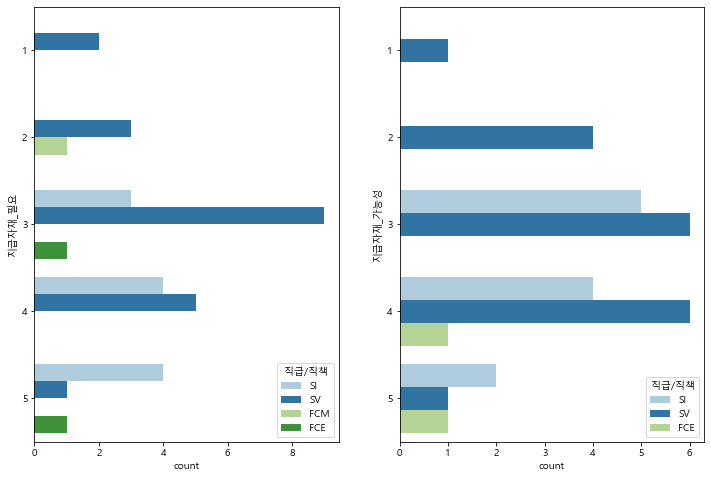

In [80]:
df_approval_filtered1=df_approval.loc[ df['지급자재_필요'].notnull(),
                                      ['직급/직책','지급자재_필요',"지급자재_필요항목","지급자재_가능성","지급자재_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"지급자재_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['지급자재_가능성'].notnull(), ['직급/직책','지급자재_필요',"지급자재_필요항목","지급자재_가능성","지급자재_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"지급자재_가능성":"int64"})
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='지급자재_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='지급자재_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### 지급자재 필요성 - 1점 

In [81]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==1,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['해당 사항이 없습니다.', '필요없다고 생각한다']

### 지급자재 필요성 -2점

In [82]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==2,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['당 현장은 발주처 지급자재가 거의 없기 때문에 자동화 필요여부가 무의미 하다.',
 '딱히 없음.',
 '공사를 하다 보면, 긴급으로 자재가 필요한 경우가 많아서 A공사를 위해 신청한 배관을 B공사에 사용하기도 하고, 예비 물량 반영하여 실제 필요 물량보다 많이 발주하기도 함. 해당 사항을 시스템화/자동화 시키면 공사 유연성이 떨어질 것 같음.',
 '개인적인 의견으로 지급자재 관리 자동화라 하면 BIM이 우선 되어야 한다고 생각함(설계도면에서 BIM으로 출도, 자동으로 물량이 산출되고, 이를 Shop DWG Revision하여 물량 틀린 부분에 대해 Comment를 달고 이를 CM이 검토, 발주처가 승인할 수 있어야 자동화 구현됨). ']

### 지급자재 필요성 -3점

In [83]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==3,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['불필요 / 자동화시 프로그램 사용에 대한 문제점',
 'BM 에 따른 신청 자동화, 스케줄에 맞춘 선지급 신청',
 '지급자재 현황 상시 확인',
 '지급자재 현황 상시 확인',
 '지급자재 현황 상시 확인',
 '현황공유',
 None,
 '자재입고 tag 관리',
 '자재발주 요청서 시스템 결재',
 '지급 자재 신청 (Excel) 업데이트하여 실시간 모니터링 가능',
 '현황공유',
 '설계와 연동하여 자재구매',
 None]

### 지급자재 필요성 -4점

In [84]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==4,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['입고/제작 현황 지급과 도급 구분 관리',
 '실시간 모니터링',
 '배관자재',
 '매일 필요자재  확인유무',
 '매일 필요자재  확인유무',
 '지급자재 신청서의 Back Data 중에 하나인 도면 표시부분의 자동화',
 '매일 필요자재  확인유무',
 '시스템으로 발주하고 실시간으로 진행 현황 확인 가능',
 '실시간 Monitoring']

### 지급자재 필요성 -5점

In [85]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_필요']==5,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['자재별 납기일정 및 재고수량 Monitoring',
 '지급 자재 Monitoring ',
 '물량관리, 집계 등 Data관리 필요.',
 'FMCS 시스템에서 BIM 자료 물량 발주 및 Stock 관리등 대표물량 (배관) 지급자재는 도입하여 사용 하면 현재 문서처리 되고 있는 업무에 효율이 좋을것 같다',
 '자재파악이 수월하며 관련자가 수급이 원활함.',
 '업체별 입고/사용/재고 물량 취합']

### 지급자재 가능성 -1점

In [86]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==1,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['필요없다고 생각한다']

### 지급자재 가능성 -2점

In [87]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==2,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['당 현장은 발주처 지급자재가 거의 없기 때문에 자동화 필요여부가 무의미 하다.', '딱히 없음.', '현황공유', '현황공유']

### 지급자재 가능성 - 3점

In [88]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==3,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['실시간 모니터링',
 'FMCS 시스템에서 BIM 자료 물량 발주 및 Stock 관리등 대표물량 (배관) 지급자재는 도입하여 사용 하면 현재 문서처리 되고 있는 업무에 효율이 좋을것 같다',
 None,
 '자재입고 tag 관리',
 '매일 필요자재  확인유무',
 '매일 필요자재  확인유무',
 '자재발주 요청서 시스템 결재',
 '지급자재 신청서의 Back Data 중에 하나인 도면 표시부분의 자동화',
 '매일 필요자재  확인유무',
 '실시간 Monitoring',
 None]

### 지급자재 가능성 - 4점

In [89]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==4,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['불필요 / 자동화시 프로그램 사용에 대한 문제점',
 '입고/제작 현황 지급과 도급 구분 관리',
 '지급 자재 Monitoring ',
 'BM 에 따른 신청 자동화, 스케줄에 맞춘 선지급 신청',
 '지급자재 현황 상시 확인',
 '지급자재 현황 상시 확인',
 '지급자재 현황 상시 확인',
 '자재파악이 수월하며 관련자가 수급이 원활함.',
 '지급 자재 신청 (Excel) 업데이트하여 실시간 모니터링 가능',
 '시스템으로 발주하고 실시간으로 진행 현황 확인 가능',
 '설계와 연동하여 자재구매']

### 지급자재 가능성 - 5점

In [90]:
df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['지급자재_가능성']==5,["지급자재_필요항목"]]
df_meet_need_text['지급자재_필요항목'].tolist()

['자재별 납기일정 및 재고수량 Monitoring',
 '물량관리, 집계 등 Data관리 필요.',
 '배관자재',
 '업체별 입고/사용/재고 물량 취합']

## 시각화 : 배관용접관리

In [91]:
df_approval=df.loc[:,['배관용접_필요',"배관용접_필요항목","배관용접_가능성","배관용접_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   이름          45 non-null     object 
 1   설문 송부       45 non-null     object 
 2   회신 여부       45 non-null     object 
 3   작성율         45 non-null     float64
 4   직급/직책       45 non-null     object 
 5   Dept.       45 non-null     object 
 6   Pjt         45 non-null     object 
 7   직무경력_FCM    2 non-null      object 
 8   직무경력_FCE    11 non-null     object 
 9   직무경력_SI     18 non-null     object 
 10  직무경력_SV     38 non-null     object 
 11  직무경력_기타     3 non-null      object 
 12  상품경력_산업     16 non-null     float64
 13  상품경력_환경     34 non-null     float64
 14  상품경력_화공     14 non-null     float64
 15  배관용접_필요     37 non-null     float64
 16  배관용접_필요항목   31 non-null     object 
 17  배관용접_가능성    36 non-null     float64
 18  배관용접_가능성이유  35 non-null     object 
dtypes: float64(6), object(13)
memor

<AxesSubplot:xlabel='count', ylabel='배관용접_가능성'>

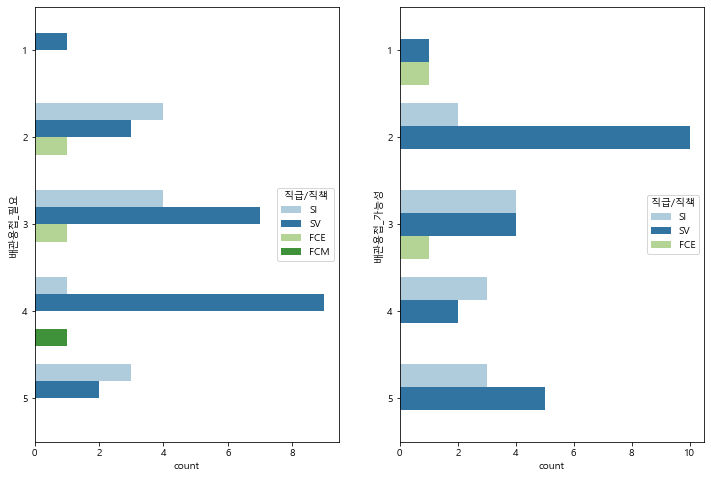

In [92]:
df_approval_filtered1=df_approval.loc[ df['배관용접_필요'].notnull(),
                                      ['직급/직책','배관용접_필요',"배관용접_필요항목","배관용접_가능성","배관용접_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"배관용접_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['배관용접_가능성'].notnull(),
                                      ['직급/직책','배관용접_필요',"배관용접_필요항목","배관용접_가능성","배관용접_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"배관용접_가능성":"int64"})
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='배관용접_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='배관용접_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### 배관용접관리 필요성 - 1점 

In [93]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==1,["배관용접_필요항목"]]
df_meet_need_text['배관용접_필요항목'].tolist()

['없습니다.']

### 배관용접관리 필요성 - 2점 

In [94]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==2,["배관용접_필요항목"]]
df_meet_need_text['배관용접_필요항목'].tolist()

['용접 검사 History 실적 관리, 진행상황 도표화',
 None,
 '품질관리자 및 용접전문성이 있는 담당자가 눈으로 실질적으로 검사하는 관계로 자동화는 어려울것 같음',
 '용접 실적 관리',
 '용접실적 상시 확인, 생산성 산출',
 None,
 None,
 '검사는 필드에서 직접해야하고 실적 및 자료는 서류화 가능']

### 배관용접관리 필요성 - 3점 

In [95]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==3,["배관용접_필요항목"]]
df_meet_need_text['배관용접_필요항목'].tolist()

['엑셀 로그 관리로 충분하다 사료 됨',
 '용접 Point 검사보다는 용접작업의 자동화가 더 시급해 보인다',
 '일일 생산성 관리',
 '용접실적 상시 확인, 생산성 산출',
 '용접실적 상시 확인, 생산성 산출',
 None,
 '용접 실적 취합',
 '이미 도입 되었는지 모르겠지만 용접부에 QR CODE 부착하여 해당 CODE 조회 시, 용접사 정보, 배관 입고/검사일, 용접 완료일 확인 가능하면 좋겠음',
 '용접 Point 수행 / 검사자 관리기록, 검사 後 Point 수량 data 확보',
 'PVDF 융착기 처럼 작업과 검사 Sticker가 동시에 나오는 시스템',
 None,
 None]

### 배관용접관리 필요성 - 4점 

In [96]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==4,["배관용접_필요항목"]]
df_meet_need_text['배관용접_필요항목'].tolist()

['계획/실적 관리, Welder 및 기량 관리(부적합 등)',
 '용접 실적 DB화',
 '검사기록, 지적사항 등 온라인으로 조회 가능하게 만들기',
 '서류 표준화',
 '서류 표준화',
 '용접 실명제 Tag에 고유 넘버를 부여하고, 용접사 정보, 용접일 정보 같은게 Scan으로 입력되게 하고',
 '용접, 융착, 체결 포인트 도면에 표시하는 작업',
 '서류 표준화',
 '검사 포인트에 대한 검색 및 결과 저장',
 '용접 실적 Monitoring 및 용접 Traceability 편리',
 '위험물 배관에 대한 용접 Point 검사 필요함.']

### 배관용접관리 필요성 - 5점 

In [97]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_필요']==5,["배관용접_필요항목"]]
df_meet_need_text['배관용접_필요항목'].tolist()

['용접 Point별 Monitoring 필요',
 '용접검사(Fit-up검사, Bead검사)시 사진촬영 update 및 실시간 자료관리',
 '용접단계별 검사 후 Data입력 관리를 통해 작업현황 Monitoring필요',
 '용접 STEP 별 Monitoring 기능 (검사 결과 포함)\nData Base 화 되어있는게 없다 ( 엑셀리스트 뿐 )',
 '인건비 및 소요경비 절약 및 일괄적인 스케즐관리가 수월하며 Data화 가능 및 전산처리']

### 배관용접관리 가능성 - 1점 

In [98]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==1,["배관용접_가능성이유"]]
df_meet_need_text['배관용접_가능성이유'].tolist()

['실제 현장에서 검사해야하는 사항이라 생각합니다.', 'Data 업데이트 어려움, 인력 추가 필요']

### 배관용접관리 가능성 - 2점 

In [99]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==2,["배관용접_가능성이유"]]
df_meet_need_text['배관용접_가능성이유'].tolist()

['용접 Point 자동화 검사는 실질적으로 불가능하다 판단됨. 장비를 활용하더라도 인력투입 필요',
 '불특정하게 이루어지는 행위로 누적시 업무량 증가',
 '현실화가 쉽지는 않아보인다.',
 '자동화로 인한 추가작업으로 생산성 저하 우려',
 '기존 관리방법 유지 ',
 '기존 관리방법 대비 개선부분 미비함',
 '기존 관리방법 대비 개선부분 미비함',
 '복잡한 절차',
 '검사수행 인원이 부족하고 체계적인 절차 및 Data System구죽이 미비',
 '자동화 필요성 부족',
 '발주처별 요구 양식 상이',
 '복잡한 절차']

### 배관용접관리 가능성 -3점 

In [100]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==3,["배관용접_가능성이유"]]
df_meet_need_text['배관용접_가능성이유'].tolist()

['표준화 미비 되어있고 품질관리자 직원의 검사만 정확성이 있을것 같음.',
 '용접 실적 취합용 FMCS존재. 산업환경化 필요. 하지만 용접 실적을 시스템에 입력하는건 결국 인력이 진행함.',
 '협력사도, 당사도 항상 사람이 모자란데 데이터베이스 관리를 누가 할 것인지 의문임',
 '육안검사 가능한  인공지능 로봇 없음',
 'Point 비파괴 검사가 전수조사가 아닌만큼 자료 추후 활용성이 떨어지는것으로 생각됨',
 '자동 용접기를 사용하는 경우에만 적용 가능성, 그외 수동용접은 X',
 '방대한 ISO 도면 등록의 어려움. 수정도면 발생 시 관리의 어려움 ',
 None,
 '표준화 미비']

### 배관용접관리 가능성 -4점 

In [101]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==4,["배관용접_가능성이유"]]
df_meet_need_text['배관용접_가능성이유'].tolist()

['엑셀 로그 관리로 충분하다 사료 됨',
 '현재도 용접부 검사의 자동화가 어느정도 진행되고 있으므로 불가하지는 않을 것이다',
 '안전 품질 검사 및 현장 돌발 이벤트외는 자료수집 가능',
 '시스템화하여 검측 이력관리 manhour를 줄여야함',
 '비파괴 검사 장비를 이용 샘플 검사 필요']

### 배관용접관리 가능성 - 5점 

In [102]:
df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관용접_가능성']==5,["배관용접_가능성이유"]]
df_meet_need_text['배관용접_가능성이유'].tolist()

['발주처 Needs(시스템 관리), 현재 엑셀관리의 Human Error 제거',
 '용접 Point 검사 소요시간은 많으나 지속적으로 부적합 발생',
 '현재 일일 물량관리 Data를 엑셀로 관리하고 있으며, 현장에서 즉시 upload할수 있도록 앱 개발 가능성 높음',
 '기존 FMCS를 산업 환경에 맞게 변형 하여 적용 가능 하다고 봄\n추가적으로 FMCS 와 비슷한 프로그램 도입중으로 알고 있다.\n충분히 가능하지만 설계/시공/품질 간에 인력구성 및 운영에 대해 기준성 과 관리가 필요 하다',
 '미비하나 실행중임',
 '미비하나 실행중임',
 '부적합 및 문제점 포인트가 정확히 Data화 전산처리 집계로 누적관리 효율이 증대',
 '미비하나 실행중임']

## 시각화 : 기수압 Test

In [104]:
df_approval=df.loc[:,['기수압_필요',"기수압_필요항목","기수압_가능성","기수압_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   이름         45 non-null     object 
 1   설문 송부      45 non-null     object 
 2   회신 여부      45 non-null     object 
 3   작성율        45 non-null     float64
 4   직급/직책      45 non-null     object 
 5   Dept.      45 non-null     object 
 6   Pjt        45 non-null     object 
 7   직무경력_FCM   2 non-null      object 
 8   직무경력_FCE   11 non-null     object 
 9   직무경력_SI    18 non-null     object 
 10  직무경력_SV    38 non-null     object 
 11  직무경력_기타    3 non-null      object 
 12  상품경력_산업    16 non-null     float64
 13  상품경력_환경    34 non-null     float64
 14  상품경력_화공    14 non-null     float64
 15  기수압_필요     39 non-null     float64
 16  기수압_필요항목   36 non-null     object 
 17  기수압_가능성    38 non-null     float64
 18  기수압_가능성이유  36 non-null     object 
dtypes: float64(6), object(13)
memory usage: 6.8+ KB


<AxesSubplot:xlabel='count', ylabel='기수압_가능성'>

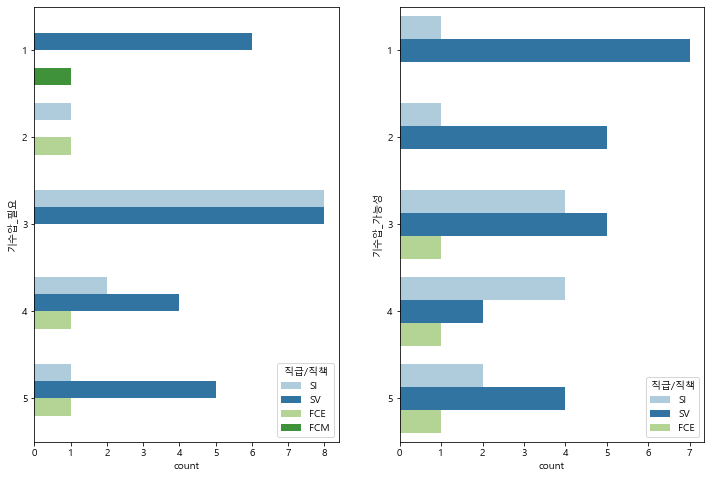

In [105]:
df_approval_filtered1=df_approval.loc[ df['기수압_필요'].notnull(),
                                      ['직급/직책','기수압_필요',"기수압_필요항목","기수압_가능성","기수압_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"기수압_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['기수압_가능성'].notnull(),
                                      ['직급/직책','기수압_필요',"기수압_필요항목","기수압_가능성","기수압_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"기수압_가능성":"int64"})
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='기수압_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='기수압_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### 기수압 Test 필요성 - 1점 

In [107]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==1,["기수압_필요항목"]]
df_meet_need_text['기수압_필요항목'].tolist()

['기수압 검사 History 실적 관리, 진행상황 도표화',
 '없습니다.',
 '없음',
 '없음',
 '없음',
 '없음',
 '일반적으로 24시간 정도 진행되고, 별도의 Recorder로 Analog 형태로 진행되어야 하는 Test이기 때문에 별도 자동화 필요 없음']

### 기수압 Test 필요성 - 2점 

In [108]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==2,["기수압_필요항목"]]
df_meet_need_text['기수압_필요항목'].tolist()

['담당 인력이 엑셀을 이용한 PKG 관리시 휴먼 에러 및 중복 수행이 가능 할 수 있다.',
 '기수압 테스트 구간, 설정 압, 공지 통보,합격 불합격']

### 기수압 Test 필요성 - 3점 

In [109]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==3,["기수압_필요항목"]]
df_meet_need_text['기수압_필요항목'].tolist()

['불필요 / 발주처 및 감리 협의 사항이 내재되어 있음',
 'Line별 계획 및 실적 관리, 공급일(Turn-On) 관리',
 '사내공사에 따른 data수집의 어려움.',
 '기/수압 Test의 자동화를 어떻게 할 예정인지 구체적인 방향성이 궁금합니다.',
 None,
 ' STEP 별 Monitoring 기능 (검사 결과 포함)',
 '기/수압 테스트 실적 DB화',
 '기/수압 Test Monitoring 좋을 것 같음. 물론 당사 직원만 확인 가능해야 하고 협력사가 기/수압 test 신청하도록 해야 함. ',
 None,
 'NMS에서 간혹 사용하는 원형 그래프 Monitoring',
 '기/수압 Test 계획서 작성',
 '서류 DB화, 자료 축적',
 'Process',
 '기/수압 test package 자동 완성',
 None,
 '수행 자료 DB화는 필요함.']

### 기수압 Test 필요성 - 4점 

In [110]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==4,["기수압_필요항목"]]
df_meet_need_text['기수압_필요항목'].tolist()

['기수압 예상/실적 모니터링',
 '기/수압 Test Monitoring 및 관련서류 DB화',
 '기/수압 Test 결과정리 자동화',
 '검사기록, 지적사항 등 온라인으로 조회 가능하게 만들기',
 '현재 status 자동화 및 모니터링 (모바일 가능)',
 '기/수압 PKG 구성 자동화',
 '초기 설치시 설비와 연결 가능한 부분 고려 설치']

### 기수압 Test 필요성 - 5점 

In [111]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_필요']==5,["기수압_필요항목"]]
df_meet_need_text['기수압_필요항목'].tolist()

['기/수압 Test 오류발생으로 공기지연',
 '기수압 테스트 PKG 별 현황 및 결과 Data관리 System 필요',
 '관련서류 표준화',
 '관련서류 표준화',
 '검측서가 서지로 관리되고 있고, 추후 Data를 찾아보기가 어렵기때문 (일부 발주처 검측시스템 활용 中)',
 '집중관리 및 통합관리, 누적 집계 관리화 가능',
 '관련서류 표준화']

### 기수압 Test 가능성 - 1점 

In [112]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==1,["기수압_가능성이유"]]
df_meet_need_text['기수압_가능성이유'].tolist()

['기/수압 테스트는 자동화 불가능하다 판단함',
 '자동화가 불가능한 항목이라 생각합니다.',
 '기/수압을 자동으로 본다던지, Data를 실시간으로 전송하여 이상유무를 알려준다던지 하는 기술은 의미가 없을 것 같다',
 '자동화로 인한 추가작업으로 생산성 저하 우려',
 '시스템 반영자료 효용성 떨어짐',
 '시스템 반영자료 효용성 떨어짐',
 '시스템 반영자료 효용성 떨어짐',
 '압력검사는 사고와 직결됨으로 자동검사시행 어려움']

### 기수압 Test 가능성 - 2점 

In [113]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==2,["기수압_가능성이유"]]
df_meet_need_text['기수압_가능성이유'].tolist()

['유연한 대처부족',
 'System이 갖추어져 있지 않고 전문인력 부족',
 '중요 포인트 누수/누기 여부, 압력계, 시간 등만 모니터링 되면 충분할 것 같음. \ntest 완료한 구간이 3d로 표현이 되면 좋겠으나, 어려워 보임.',
 '전기 사용 등 발주처 성향으로 가능성 없음 (야간 전기사용 금지)',
 '발주처별 관리 양식 상이',
 '유연한 대처부족']

### 기수압 Test 가능성 - 3점 

In [114]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==3,["기수압_가능성이유"]]
df_meet_need_text['기수압_가능성이유'].tolist()

['불필요 / 발주처 및 감리 협의 사항이 내재되어 있음',
 '필요성 크지 않음, 관리항목 과다?',
 '사내공사에 따른 data수집의 어려움.',
 '반복되는 항목은 자동화로 정리가 가능할 것 같다.',
 '화공 FMCS 시스템 사용 필요. 실적 DB화로 간단 조회',
 '기/수압 Test 구간 도면 표시를 위한 플랫폼 구성의 어려움',
 '복잡한 절차',
 '자동화 필요성 부족',
 None,
 '표준화 미비']

### 기수압 Test 가능성 - 4점 

In [115]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==4,["기수압_가능성이유"]]
df_meet_need_text['기수압_가능성이유'].tolist()

['전체 라인에 대한 모니터링 관리',
 '복잡한 절차및 표준화미비로 서류만드는데 많은 시간이 필요할수 있다',
 '기존 CM Tool을 사용한 System 입력을 하는것으로 알고있으나 여느 프로젝트마다 인력이 엑셀 수기로 관리 중으로, 자동화가 매우 힘들것이라 생각된다.',
 '기수압 테스트 구간, 설정 압, 공지 통보,합격 불합격등의 활용 데이터가 많음',
 '시스템화하여 검측 이력관리 manhour를 줄여야함',
 None,
 '수행 자료를 DB로 저장 가능.']

### 기수압 Test 가능성 - 5점 

In [116]:
df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['기수압_가능성']==5,["기수압_가능성이유"]]
df_meet_need_text['기수압_가능성이유'].tolist()

['기/수압 Test 자동화관리로 사전 오류발생 차단',
 '기존 FMCS를 산업 환경에 맞게 변형 하여 적용 가능 하다고 봄',
 '미비하나 실행중임',
 '미비하나 실행중임',
 'Data Field 정의가 명확하면 쉽게 가능할것으로 생각함',
 'Data 화 관리 및 부적합 및 문제점에 따른 빠른 검색과 대응이 정확성이 높고 효율중대에 따른 경쟁력 강화',
 '미비하나 실행중임']

## 시각화 : SPOOL & SKID 검사

In [129]:
df_approval=df.loc[:,['SPOOL&SKID_필요',"SPOOL&SKID_필요항목","SPOOL&SKID_가능성","SPOOL&SKID_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   이름                45 non-null     object 
 1   설문 송부             45 non-null     object 
 2   회신 여부             45 non-null     object 
 3   작성율               45 non-null     float64
 4   직급/직책             45 non-null     object 
 5   Dept.             45 non-null     object 
 6   Pjt               45 non-null     object 
 7   직무경력_FCM          2 non-null      object 
 8   직무경력_FCE          11 non-null     object 
 9   직무경력_SI           18 non-null     object 
 10  직무경력_SV           38 non-null     object 
 11  직무경력_기타           3 non-null      object 
 12  상품경력_산업           16 non-null     float64
 13  상품경력_환경           34 non-null     float64
 14  상품경력_화공           14 non-null     float64
 15  SPOOL&SKID_필요     32 non-null     float64
 16  SPOOL&SKID_필요항목   30 non-null     object 
 17 

<AxesSubplot:xlabel='count', ylabel='SPOOL&SKID_가능성'>

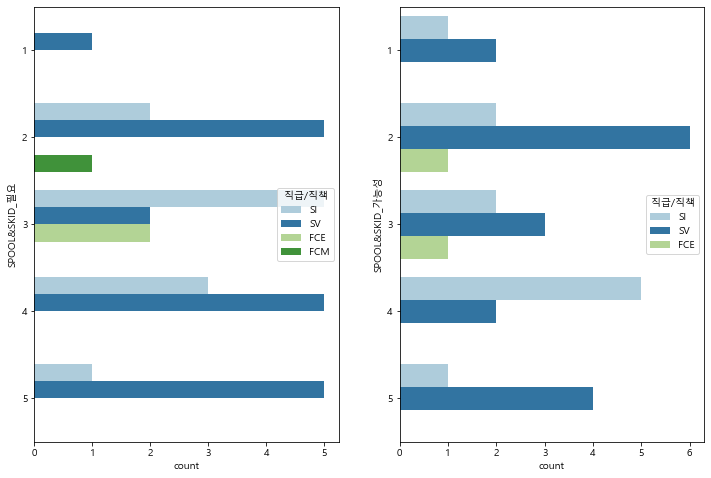

In [118]:
df_approval_filtered1=df_approval.loc[ df['SPOOL&SKID_필요'].notnull(),
                                      ['직급/직책','SPOOL&SKID_필요',"SPOOL&SKID_필요항목","SPOOL&SKID_가능성","SPOOL&SKID_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"SPOOL&SKID_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['SPOOL&SKID_가능성'].notnull(),
                                      ['직급/직책','SPOOL&SKID_필요',"SPOOL&SKID_필요항목","SPOOL&SKID_가능성","SPOOL&SKID_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"SPOOL&SKID_가능성":"int64"})
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='SPOOL&SKID_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='SPOOL&SKID_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### SPOOL & SKID 검사 필요성 - 1점

In [133]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==1,["SPOOL&SKID_필요항목"]]
df_meet_need_text['SPOOL&SKID_필요항목'].tolist()

KeyError: 'SPOOL&SKID_필요'

### SPOOL & SKID 검사 필요성 - 2점

In [120]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==2,["SPOOL&SKID_필요항목"]]
df_meet_need_text['SPOOL&SKID_필요항목'].tolist()

['Spool 검사 History 실적 관리, 진행상황 도표화',
 None,
 '검측 결과 시스템 상신',
 '없음',
 '없음',
 '없음',
 '업체별 SPOOL SKID 검사 현황',
 '항목의 용접 검사와 함께 운영하면 됨, 별도 운영 필요 없음']

### SPOOL & SKID 검사 필요성 - 3점

In [121]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==3,["SPOOL&SKID_필요항목"]]
df_meet_need_text['SPOOL&SKID_필요항목'].tolist()

['Spool/SKID 검수 결화 DB화가 중요함',
 'check List',
 '검사 실적 DB화',
 '설계 변경이 많지 않다면 Spool/SKID 번호 부여하여 검측 History 관리되면 좋겠지만 실제로 설계 변경이 많기 때문에, 그 때마다 번호를 새로 부여하거나 수정하기가 어려워 보임.',
 '육안검사, 치수검사 기록 보존',
 '특별히 필요한 부분 없음',
 '검수 결과 모니터링',
 '서류 DB화, 자료 축적',
 '검수 결과 DB화']

### SPOOL & SKID 검사 필요성 - 4점

In [122]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==4,["SPOOL&SKID_필요항목"]]
df_meet_need_text['SPOOL&SKID_필요항목'].tolist()

['검사 신청을 위한 자료 / 협력사에 필요 할것으로 사료 됨',
 '검사 실적 관리',
 '3D Scan을 통해 도면과 비교할 수 있으면 좋을것 같다',
 'Spool/SKID 검수 결과 DB화',
 '검사기록, 지적사항 등 온라인으로 조회 가능하게 만들기',
 '도면 일치화 확인기능',
 '검사 Check Sheet ',
 None]

### SPOOL & SKID 검사 필요성 - 5점

In [123]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_필요']==5,["SPOOL&SKID_필요항목"]]
df_meet_need_text['SPOOL&SKID_필요항목'].tolist()

['Spool/SKID 검사 진행사항 Monitoring 필요',
 'Spool에 대한 제작/검사/이동/설치 현황에 대한 Data System 필요',
 '서류 및 검측기준',
 '서류 및 검측기준',
 '일괄적 공통적으로 관리가 수월함 / 체계적으로 이에 따른 Risk 감소',
 '서류 및 검측기준']

### SPOOL & SKID 검사 가능성 - 1점

In [124]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==1,["SPOOL&SKID_가능성이유"]]
df_meet_need_text['SPOOL&SKID_가능성이유'].tolist()

['자동화 불가능하다 판단함',
 '협력사에서 갖춰져야 할 시스템이라 생각합니다.',
 '공장제작 검수 /  입고검수를 감리단 과 입회검사 진행 중으로 자동화가 무슨 의미 인지 잘 모르겠다.']

### SPOOL & SKID 검사 가능성 - 2점

In [125]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==2,["SPOOL&SKID_가능성이유"]]
df_meet_need_text['SPOOL&SKID_가능성이유'].tolist()

['산업특성상 스풀과 스키드의 범위가 좁아 용접포인트 검사 자동화로 대체 가능',
 '3D Scan등의 정합성 현실화가 쉽지 않을 것이다',
 '자동화로 인한 추가작업으로 생산성 저하 우려',
 '시스템 반영자료 효용성 떨어짐',
 '시스템 반영자료 효용성 떨어짐',
 '시스템 반영자료 효용성 떨어짐',
 'System이 갖추어져 있지 않고 전문인력 부족',
 '자동화 부분이 분명하지 않다.',
 '복잡한 절차']

### SPOOL & SKID 검사 가능성 - 3점

In [126]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==3,["SPOOL&SKID_가능성이유"]]
df_meet_need_text['SPOOL&SKID_가능성이유'].tolist()

['실적 정도 관리하는 수준이었으면 함.',
 'Spool 형태가 다양하여 일부만 자동화가 가능할 것 같다.',
 '화공 FMCS 시스템 사용 필요. 실적 DB화로 간단 조회',
 '기자재 比 검사항목에 대한 표준화 미비, 용접Point검사 等 별도 검사항목이 존재',
 '자동화 필요성 부족',
 '검수 자료 DB화 가능하다고 판단함.']

### SPOOL & SKID 검사 가능성 - 4점

In [127]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==4,["SPOOL&SKID_가능성이유"]]
df_meet_need_text['SPOOL&SKID_가능성이유'].tolist()

['검사 신청을 위한 자료 / 협력사에 필요 할것으로 사료 됨',
 '표준화 미비.',
 '외부 Shop장 검측과 data 확보가 쉽다.',
 '시스템화하여 검측 이력관리 manhour를 줄여야함',
 '도면 및 3차원 데이터 입력으로 로봇이 일치여부 인지가능',
 'Check 항목의 일원화가 가능하다면 충분히 업무효율성이 높아질 수 있다고 생각합니다. ',
 None]

### SPOOL & SKID 검사 가능성 - 5점

In [128]:
df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['SPOOL&SKID_가능성']==5,["SPOOL&SKID_가능성이유"]]
df_meet_need_text['SPOOL&SKID_가능성이유'].tolist()

['외부 Shop장 검사진행으로 Data확보 어려움과 많은 소요시간 발생',
 '미비하나 실행중임',
 '미비하나 실행중임',
 '인력관리 Data 관리가 수월 하며 불합리, 부적합에 즉시 대응이 용이함.',
 '미비하나 실행중임']

## 시각화 : 배관 설치 검사

In [130]:
df_approval=df.loc[:,['배관설치검사_필요',"배관설치검사_필요항목","배관설치검사_가능성","배관설치검사_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   이름            45 non-null     object 
 1   설문 송부         45 non-null     object 
 2   회신 여부         45 non-null     object 
 3   작성율           45 non-null     float64
 4   직급/직책         45 non-null     object 
 5   Dept.         45 non-null     object 
 6   Pjt           45 non-null     object 
 7   직무경력_FCM      2 non-null      object 
 8   직무경력_FCE      11 non-null     object 
 9   직무경력_SI       18 non-null     object 
 10  직무경력_SV       38 non-null     object 
 11  직무경력_기타       3 non-null      object 
 12  상품경력_산업       16 non-null     float64
 13  상품경력_환경       34 non-null     float64
 14  상품경력_화공       14 non-null     float64
 15  배관설치검사_필요     37 non-null     float64
 16  배관설치검사_필요항목   30 non-null     object 
 17  배관설치검사_가능성    35 non-null     float64
 18  배관설치검사_가능성이유  33 non-null     ob

<AxesSubplot:xlabel='count', ylabel='배관설치검사_가능성'>

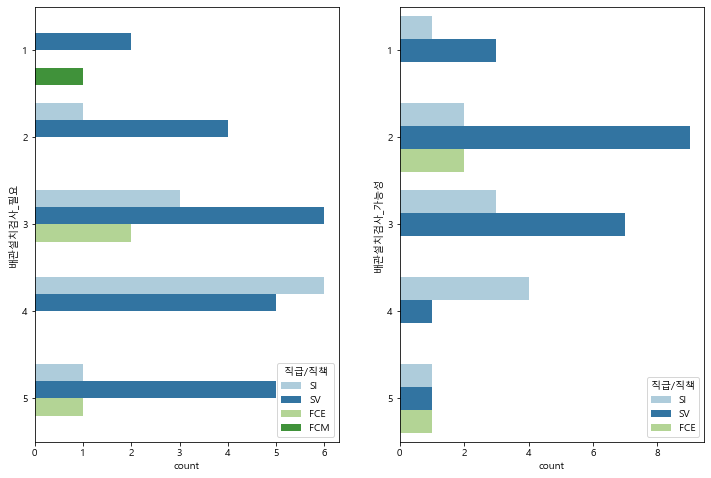

In [132]:
df_approval_filtered1=df_approval.loc[ df['배관설치검사_필요'].notnull(),
                                      ['직급/직책','배관설치검사_필요',"배관설치검사_필요항목","배관설치검사_가능성","배관설치검사_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"배관설치검사_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['배관설치검사_가능성'].notnull(),
                                      ['직급/직책','배관설치검사_필요',"배관설치검사_필요항목","배관설치검사_가능성","배관설치검사_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"배관설치검사_가능성":"int64"})
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='배관설치검사_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='배관설치검사_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### 배관 설치 검사 필요성 - 1점

In [149]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==1,["배관설치검사_필요항목"]]
df_meet_need_text['배관설치검사_필요항목'].tolist()

['없습니다', None, None]

### 배관 설치 검사 필요성 - 2점

In [137]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==2,["배관설치검사_필요항목"]]
df_meet_need_text['배관설치검사_필요항목'].tolist()

['검사결과의 DB화가 현장에서 어떤 도움을 줄 지 의문이다',
 '없음, 기록/지적사항 현재 확인 가능',
 '없음, 기록/지적사항 현재 확인 가능',
 '없음, 기록/지적사항 현재 확인 가능',
 None]

### 배관 설치 검사 필요성 - 3점

In [138]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==3,["배관설치검사_필요항목"]]
df_meet_need_text['배관설치검사_필요항목'].tolist()

[None,
 '배관 검사기록 확인',
 None,
 ' STEP 별 Monitoring 기능 (검사 결과 포함)',
 '검사 실적 DB화',
 '용접부 QR CODE ',
 'BIM (현재 하고 있음)',
 '시공 검측에 대한 자동화 개념을 정확히 이해하기 어려움',
 '현재 status 자동화 및 모니터링 (모바일 가능)',
 None,
 None]

### 배관 설치 검사 필요성 - 4점

In [139]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==4,["배관설치검사_필요항목"]]
df_meet_need_text['배관설치검사_필요항목'].tolist()

['검사 신청을 위한 자료 / 협력사에 필요 할것으로 사료 됨',
 '검사 실적 관리',
 '도면일치여부 및 불합리 Data화 관리',
 '전체 라인에 대한 예상/실적 모니터링 및 펀치관리',
 '검사기록 기록사항등 온라인으로 조회하면 빠르게 검측한 사항을 점검할수 있음.',
 '일일 반복 검사 및 Data확보 필요.',
 '설치 상태 검측 결과 DB화',
 '검사기록, 지적사항 등 온라인으로 조회 가능하게 만들기',
 '검사 현황 모니터링 및 DB화',
 '검사기록, 지적사항 등 온라인 조회',
 '시공 검측 결과 DB화 필요']

### 배관 설치 검사 필요성 - 5점

In [140]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_필요']==5,["배관설치검사_필요항목"]]
df_meet_need_text['배관설치검사_필요항목'].tolist()

['검사항목에 대한 부적합 Monitoring 필요',
 '검사현황 및 펀치사항 기록관리',
 '검측서류 및 절차 표준화',
 '검측서류 및 절차 표준화',
 '검측 서류 작성 (BM, CQI목록 취합, 관련도면, VP 等 관련자료 자동연결)',
 'Data화에 장점 및 인력, 금액적에 따른 Riskrk 절감, 품질적으로 향상되는 효과가 나타남.',
 '검측서류 및 절차 표준화']

### 배관 설치 검사 가능성 - 1점

In [141]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==1,["배관설치검사_가능성이유"]]
df_meet_need_text['배관설치검사_가능성이유'].tolist()

['자동화가 불가능한 항목이라 생각합니다.',
 '시공 검측 자동화가 가능한 것인지 의문이다',
 None,
 'line을 타면서 직접 사람이 검사하는 사항이라 자동화가 불가능']

### 배관 설치 검사 가능성 - 2점

In [142]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==2,["배관설치검사_가능성이유"]]
df_meet_need_text['배관설치검사_가능성이유'].tolist()

['자동화 검측이 실질적 불가능하다 판단함.',
 '사내 공사 및 사진확보 어려움',
 '표준화가 어려울 것으로 보인다.',
 '검측 Doc. 관리가 아닌 검측 실업무가 자동화 구현 가능한지 모르겠다.',
 '자동화로 인한 추가작업으로 생산성 저하 우려',
 '시스템 반영자료 효용성 떨어짐',
 '시스템 반영자료 효용성 떨어짐',
 '시스템 반영자료 효용성 떨어짐',
 'System이 갖추어져 있지 않고 전문인력 부족',
 None,
 '시공 검측에 대한 자동화 개념을 정확히 이해하기 어려움',
 '복잡한 절차',
 '자동화 실현성 낮음']

### 배관 설치 검사 가능성 - 3점

In [147]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==3,["배관설치검사_가능성이유"]]
df_meet_need_text['배관설치검사_가능성이유'].tolist()

['실적 정도 관리하는 수준이었으면 함, 발주처 별도 시스템 관리 중(중복관리)',
 '복잡한 절차',
 '복잡한 절차',
 '화공 FMCS 시스템 사용 필요. 실적 DB화로 간단 조회',
 '상품별 차이',
 '상품별 차이',
 '발주처 특성상 자동장치 현장 반입 불가',
 '상품별 차이',
 '검사 단계',
 '표준화 미비']

### 배관 설치 검사 가능성 - 4점

In [145]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==4,["배관설치검사_가능성이유"]]
df_meet_need_text['배관설치검사_가능성이유'].tolist()

['검사 신청을 위한 자료 / 협력사에 필요 할것으로 사료 됨',
 'Data확보 어려움이 있고 각 사업장마다 표준화및 양식이 틀릴수 있슴 그래서 양식 표준화 및 절차 표준안이 만들어진것이 있으면 SITE 현장 직원들이 쉽게 작성해서 시간이 많이 절약할수 있슴.',
 '시스템화하여 검측 이력관리 manhour를 줄여야함',
 'System 구현 가능',
 '시공검측자료 시스템 입력 가능.']

### 배관 설치 검사 가능성 - 5점

In [146]:
df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['배관설치검사_가능성']==5,["배관설치검사_가능성이유"]]
df_meet_need_text['배관설치검사_가능성이유'].tolist()

['검측서류 간소화 및 검사 항목별 Data 확보 필요',
 '관련자료 Digital 化 추진 中 (일부 발주처 표준양식도 존재)',
 '누적 Data화 관리로 생산 제품의 품질를 향상등 불합리, 부적합의 원인과 f이를 대응하는데 신속대응이 가능해짐.']

## 시각화 : 작업 지시서 발행

In [38]:
df_approval=df.loc[:,['작업지시서_필요',"작업지시서_필요항목","작업지시서_가능성","작업지시서_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   이름           45 non-null     object 
 1   설문 송부        45 non-null     object 
 2   회신 여부        45 non-null     object 
 3   작성율          45 non-null     float64
 4   직급/직책        45 non-null     object 
 5   Dept.        45 non-null     object 
 6   Pjt          45 non-null     object 
 7   직무경력_FCM     2 non-null      object 
 8   직무경력_FCE     11 non-null     object 
 9   직무경력_SI      18 non-null     object 
 10  직무경력_SV      38 non-null     object 
 11  직무경력_기타      3 non-null      object 
 12  상품경력_산업      16 non-null     float64
 13  상품경력_환경      34 non-null     float64
 14  상품경력_화공      14 non-null     float64
 15  작업지시서_필요     38 non-null     float64
 16  작업지시서_필요항목   30 non-null     object 
 17  작업지시서_가능성    37 non-null     float64
 18  작업지시서_가능성이유  33 non-null     object 
dtypes: float64

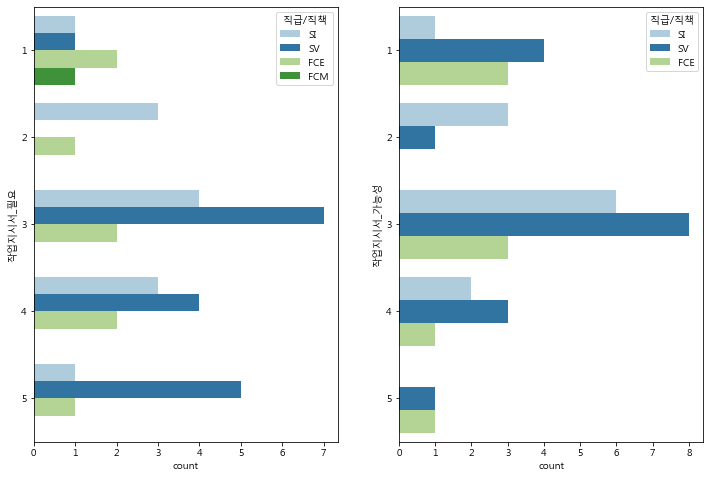

In [39]:
df_approval_filtered1=df_approval.loc[ df['작업지시서_필요'].notnull(),
                                      ['직급/직책','작업지시서_필요',"작업지시서_필요항목","작업지시서_가능성","작업지시서_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"작업지시서_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['작업지시서_가능성'].notnull(),
                                      ['직급/직책','작업지시서_필요',"작업지시서_필요항목","작업지시서_가능성","작업지시서_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"작업지시서_가능성":"int64"})
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='작업지시서_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='작업지시서_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### 작업 지시서 발행 필요성 - 1점

In [22]:
df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==1]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==1,["작업지시서_필요항목"]]
df_meet_need_text['작업지시서_필요항목'].tolist()

[None,
 None,
 None,
 '금액미정 작업지시서는 내역이 즉시필요하지는 않음',
 '(하도급법에 의해 작업지시서 발행때 단가 검토, 협의가 들어가야 함), 물량 자동 산출과는 별개의 이야기임']

### 작업 지시서 발행 필요성 - 2점

In [23]:
df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==2]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==2,["작업지시서_필요항목"]]
df_meet_need_text['작업지시서_필요항목'].tolist()

['표준화가 어려울것 같습니다.', None, '특별히 필요없다고 생각함', '내용만 입력하면 자동 생성되고 자동 검토 및 발송됨']

### 작업 지시서 발행 필요성 - 3점

In [24]:
df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==3]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==3,["작업지시서_필요항목"]]
df_meet_need_text['작업지시서_필요항목'].tolist()

['협력사에 필요한 사항으로 사료 됨',
 '추가 건 별 간단히 시스템 등록하여 공무/공사가 실시간 공유.',
 '물가정보/적산정보 DB 매월호 업데이트되어 자동으로 신규단가 추출할 수 있도록 시스템 구축',
 '절차 번거로움',
 '절차 번거로움',
 None,
 '작업지시서 작성',
 '절차 번거로움',
 '도면 개정에 따른 물량변경 시 금액 미확정 작업지시서 자동생성/발송',
 None,
 None,
 None,
 'Fast track 공사 특성상 도면 수정이 많아 자동화가 어려움']

### 작업 지시서 발행 필요성 - 4점

In [25]:
df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==4]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==4,["작업지시서_필요항목"]]
df_meet_need_text['작업지시서_필요항목'].tolist()

['적기 작업지시서 발행(지연/누락 방지)',
 '추가 내역 List-up 자동화',
 '작업지시 자동 리스트업 및 모니터링',
 '도면 Status에 따른 금액 미확정 작어 지시서 자동생성/발송',
 '기계약단가 자동적용 등 내역 자동 산출',
 '현재 SFCE를 통한 시스템 사용시 별도의 서지 작성이 불필요하다',
 '물량(도면) 내역화 및 단가 비교',
 '해당 TOOL이 있다면 검토 및 일정 관리에 유용할꺼 같음',
 '도면 개정에 따른 물량변경 시 금액 미확정 작업지시서 자동생성/발송']

### 작업 지시서 발행 필요성 - 5점

In [26]:
df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==5]
df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['작업지시서_필요']==5,["작업지시서_필요항목"]]
df_meet_need_text['작업지시서_필요항목'].tolist()

['긴급 작업시 미확정 작업지시서 자동생성 필요',
 '금액 미확정 작업지시서 자동생성',
 '현장 시공에 집중해야 할 시공담당자가 본사 담당자와의 내역논쟁으로 시간을 허비하는게 너무 안타깝다',
 '물량(도면) 내역화 및 단가 비교',
 '물량(도면) 내역화 및 단가 비교',
 '물량(도면) 내역화 및 단가 비교',
 '미확정 작업 지시서 자동생성/발송']

### 작업 지시서 발행 가능성

In [30]:
a=[1,2,3,4,5]

In [40]:
for i in a:
    df_approval_filtered1.loc[df_approval_filtered1['작업지시서_가능성']==i]
    df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['작업지시서_가능성']==i,["작업지시서_가능성이유"]]
    print(i,"번째")
    print(df_meet_need_text['작업지시서_가능성이유'].tolist())
    print("\n")

1 번째
['각 협력사의 계약내용 및 협력사 Scope은 자동화 관리가 불가능함,', '설계부터 준비과정이 많음', '표준화 어려움', '표준화 어려움', '표준화 어려움', '작업 지시서 항목이 달라, 기본 포멧에 담당자가 입력해야해서 자동화 가능성 없음', '효용성이 없음', '작업지시서에 대한 내역 작성이 필요한데 자동화가 어려울것같다']


2 번째
['신규작업의 생산성에 따른 단가 산정에 \n사람이 판단해야할 부분이 많음.', None, '작업지시의 자동화 의미 없음 (내용 단순)', '공사하면서 도면이 출도되고, 선 시공후 As-built 반영하는 경우도 있어 자동화가 어려움']


3 번째
['현재 Process에서 완전 전환 필요, 아닐 경우 2중 업무', 'S CAR 보다 간략하게 만들었으면 합니다. 발주처와의 근거를 필요로 하는 부분으로 근거 수집을 위한 간단한 시스템이 필요합니다.', '표준화 미비 및 복잡한 절차가 많은 시간소요 될수 있음', '내역서 표준화의 어려움 및 삼성전자공사의 경우 현장맞춤형 공사가 많음.', '건별 단가 기준 상이한 것이 많음.', '표준화가 어려울것 같습니다.', None, '복잡한 절차', '복잡한 절차', None, '설계사 분리에 따른 변경여부 실시간 모니터링 및 반영에 수동입력 또는 설계사, 당사간 사전협의 필요', '자동화에 대한 효과 제한적이라 생각합니다.', '복잡한 절차', '복잡한 절차와 표준화 어려움', '설계사 분리에 따른 변경여부 실시간 모니터링 및 반영에 수동입력 또는 협력사, 설계사, 당사간 사전협의 필요', None, '복잡한 절차']


4 번째
['협력사에 필요한 사항으로 사료 됨', '기존의 백테이터 기반이 아닌 신규 작성 문건으로 기반 확립이 잘 된다면 관리가 용이하다 판단', '기존 사용하던 양식을 자동화에 반영 및 넘버링 부여가능', '내역을 내역은행화 시켜 해당되는 항목을 가져다 쓰기만 해도 많은 도움이 될 것이다', '배관 자재는 표준화가 가능할 것이기에 내역화가 자동화

## 시각화 : 대갑정산

In [47]:
df_approval=df.loc[:,['대갑정산_필요',"대갑정산_필요항목","대갑정산_가능성","대갑정산_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   이름          45 non-null     object 
 1   설문 송부       45 non-null     object 
 2   회신 여부       45 non-null     object 
 3   작성율         45 non-null     float64
 4   직급/직책       45 non-null     object 
 5   Dept.       45 non-null     object 
 6   Pjt         45 non-null     object 
 7   직무경력_FCM    2 non-null      object 
 8   직무경력_FCE    11 non-null     object 
 9   직무경력_SI     18 non-null     object 
 10  직무경력_SV     38 non-null     object 
 11  직무경력_기타     3 non-null      object 
 12  상품경력_산업     16 non-null     float64
 13  상품경력_환경     34 non-null     float64
 14  상품경력_화공     14 non-null     float64
 15  대갑정산_필요     32 non-null     float64
 16  대갑정산_필요항목   27 non-null     object 
 17  대갑정산_가능성    29 non-null     float64
 18  대갑정산_가능성이유  28 non-null     object 
dtypes: float64(6), object(13)
memor

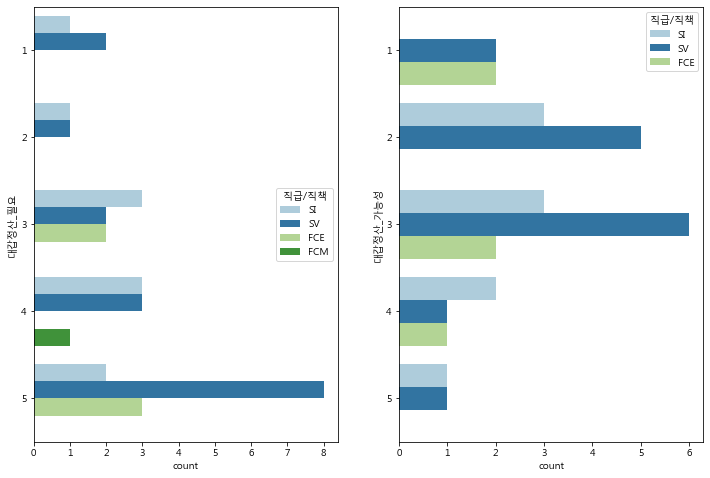

In [43]:
df_approval_filtered1=df_approval.loc[ df['대갑정산_필요'].notnull(),
                                      ['직급/직책','대갑정산_필요',"대갑정산_필요항목","대갑정산_가능성","대갑정산_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"대갑정산_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['대갑정산_가능성'].notnull(),
                                      ['직급/직책','대갑정산_필요',"대갑정산_필요항목","대갑정산_가능성","대갑정산_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"대갑정산_가능성":"int64"})
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='대갑정산_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='대갑정산_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### 대갑정산 : 필요성

In [45]:
for i in a:
    df_approval_filtered1.loc[df_approval_filtered1['대갑정산_필요']==i]
    df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['대갑정산_필요']==i,["대갑정산_필요항목"]]
    print(i,"번째")
    print(df_meet_need_text['대갑정산_필요항목'].tolist())
    print("\n")

1 번째
[None, '자동화가 현실적으로 어려울 것이라고 판단된다', None]


2 번째
['해당 없음', '정산 물량 산정 자동화']


3 번째
['내역 자동 생성', None, None, '발주처 담당자마다 기준 상이', None, '발주처 담당자의 기준 확보', '설계 변경이 많아 물량 자동 비교가 어려움']


4 번째
['대감 자료의 완성을 위한 기초자료 Set-up 필요', '물량 자동 산출, 산출서/내역서 자동 작성(단가 Code에 따라 자동 반영)', '시스템 업로드시 발주처에 승인요청 내역 자동 송부 및 결재 등등', '배관 최종 Shop 도면 기준 물량  대갑 물량 자동 비교', '배관 최종 Shop 도면 기준물량 대갑 물량 자동 비교자료', '하도급 내역을 입력하여 도급 정산자료로 자동변환', '물량 자동 산출은 필수임. 이를 갖고 설계 Revision 될때 마다 변경된 물량에  대해 Inform.을 받고 이를 계약변경에 반영하여야 함']


5 번째
['최종 도면기준 자동 물량확인 필요', '내역서 ITEM 및 물량산출', '규격 수량 입력 시 CPMS 단가 자동 삽입 기능', 'As Built 물량(도면) 내역화 및 비교', 'As Built 물량(도면) 내역화 및 비교', 'As Built 물량(도면) 내역화 및 비교', 'As Built 물량(도면) 내역화 및 비교', '대갑 내역작성', '도면기준, 백데이터', '도면기준, 백데이터', '설계 수량 BM 化 BM에 맞춘 BOQ산출', '인력 및 검증에 따른 소요시간 감축 ', '도면기준, 백데이터']




### 대갑정산 : 가능성

In [46]:
for i in a:
    df_approval_filtered1.loc[df_approval_filtered1['대갑정산_가능성']==i]
    df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['대갑정산_가능성']==i,["대갑정산_가능성이유"]]
    print(i,"번째")
    print(df_meet_need_text['대갑정산_가능성이유'].tolist())
    print("\n")

1 번째
['예로 물량 자동 비교를 원한다면 Base 자료부터 셋팅해야합니다. 지금 상황에서 자동화를 실현하기는 불가해 보입니다.', '발주처와의 협상이 주를 이루므로, 내역의 자동화는 의미가 없을 것이다', '발주처 담당자마다 기준이 상이 하기 때문에 자동화 하기에 어려운점이 있다', '기준 확보가 어렵다']


2 번째
['Data확보가 어려움.', '발주처 단가 협의가 안된 것들이 많다.', '현장마다 다른 대갑 기준', None, '복잡함', '복잡함', '발주처 특성상 요청 자료가 때마다 다름', '복잡함']


3 번째
['표준화 미비', 'Data 확보 어려움, 발주처마다 대갑 정산 방향이 조금씩 틀릴수가 있슴.', '현장마다 대갑 정산 기준이 다를 것이기 때문에 전체 표준화는 어려우나 각 현장별로 자동화 작업이 가능하다면 적용 가능할 것이다.', '방대한 Data, 표준화 어려움', '방대한 Data, 표준화 어려움', '방대한 Data, 표준화 어려움', 'CPMS 단가. 하도급 실적단가 등을 활용하면 자동화가 가능하지 않을까요', '설계집계시점보다 정산 요청시점이 통상 빠름', '도면변경 사항까지 반영하여 최종 물량을 산정할 수 있게 시스템 \n구축을 하는 것에 대해 제약이 있을 수 있다고 생각합니다. ', None, '설계 도면 확정후 시공하는 경우는 자동화 가능함.']


4 번째
['대감 자료의 완성을 위한 기초자료 Set-up 필요', '물량 검토 수작업으로 장시간 소요, Human Error 다수 발생', None, 'Ex.) 1개의 CPMS 규격명에 각 프로젝트에서 사용중인 각각의 규격을 입력하다보면 \n각각의 규격명이 축적되어 추후 프로젝트 수행 시 해당CPMS 규격명과 100% 일치하는 규격명을 기입하지 않더라도 기 입력하고 축적했던 각각의 프로젝트 규격명을 찾아 대갑내역 작성 시 CPMS 단가 자동 물림이 가능 할 것으로 생각된다.  ']


5 번째
['현장검증부터 물량산출, 내역작업까지 복잡한 절차 간소화필요', '금액의 

## 시각화 : 설계변경

In [48]:
df_approval=df.loc[:,['설계변경_필요',"설계변경_필요항목","설계변경_가능성","설계변경_가능성이유"]]
df_approval=pd.concat([df_basic,df_approval],axis=1)
df_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   이름          45 non-null     object 
 1   설문 송부       45 non-null     object 
 2   회신 여부       45 non-null     object 
 3   작성율         45 non-null     float64
 4   직급/직책       45 non-null     object 
 5   Dept.       45 non-null     object 
 6   Pjt         45 non-null     object 
 7   직무경력_FCM    2 non-null      object 
 8   직무경력_FCE    11 non-null     object 
 9   직무경력_SI     18 non-null     object 
 10  직무경력_SV     38 non-null     object 
 11  직무경력_기타     3 non-null      object 
 12  상품경력_산업     16 non-null     float64
 13  상품경력_환경     34 non-null     float64
 14  상품경력_화공     14 non-null     float64
 15  설계변경_필요     31 non-null     float64
 16  설계변경_필요항목   26 non-null     object 
 17  설계변경_가능성    29 non-null     float64
 18  설계변경_가능성이유  26 non-null     object 
dtypes: float64(6), object(13)
memor

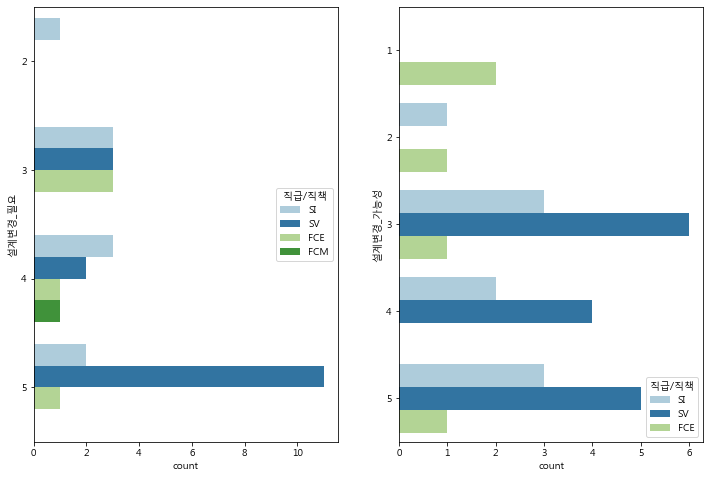

In [49]:
df_approval_filtered1=df_approval.loc[ df['설계변경_필요'].notnull(),
                                      ['직급/직책','설계변경_필요',"설계변경_필요항목","설계변경_가능성","설계변경_가능성이유"] ]
df_approval_filtered1=df_approval_filtered1.astype({"설계변경_필요":"int64"})
df_approval_filtered2=df_approval.loc[ df['설계변경_가능성'].notnull(),
                                      ['직급/직책','설계변경_필요',"설계변경_필요항목","설계변경_가능성","설계변경_가능성이유"] ]
df_approval_filtered2=df_approval_filtered2.astype({"설계변경_가능성":"int64"})
fig, ax = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(y='설계변경_필요',hue='직급/직책',data=df_approval_filtered1,palette='Paired',ax=ax[0])
sns.countplot(y='설계변경_가능성',hue='직급/직책',data=df_approval_filtered2,palette='Paired',ax=ax[1])

### 설계변경 : 필요성

In [50]:
for i in a:
    df_approval_filtered1.loc[df_approval_filtered1['설계변경_필요']==i]
    df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['설계변경_필요']==i,["설계변경_필요항목"]]
    print(i,"번째")
    print(df_meet_need_text['설계변경_필요항목'].tolist())
    print("\n")

1 번째
[]


2 번째
['revision 관리']


3 번째
[None, '설계 변경시 시스템에 revision 관리. 변경된 내용에 대한 명확한 표시', '물량 자동 업데이트, 변경 이력 DB화', None, '설계 변경 현황 모니터링', None, None, None, '설계변경이 많아 자동화하기 어려움']


4 번째
['당초/변경 물량 자동비교, 변경점 이력관리', '배관 최종 Shop 도면 기준 물량  대갑 물량 자동 비교', '배관 최종  Shop 도면 기준 물량 대갑 물량 자동 비교.', '물량만 입력하면 변경내역서가 자동으로 생성', '도실하 내역서 자동작성', '3D도면 변경으로 변경점 발견시 물량 및 공사비 자동산출 ', '산업사업 민수의 경우 Procore 등의 Platform 들을 이용하여 Revision 관리, Transmittal 관리, Approval 관리 등을 자동화 하려 함']


5 번째
['최종 도면기준 자동 물량확인 필요', 'History 관리 자동화/ BM 물량 자동산출', '설계변경에 대한 내용 공유시 확인의 어려움', '최신 도면을 손쉽게 확인', '변경사항 발생하면 AFC, 물량 자동 출도', '누적관리, 즉 반영으로 시공지연 최소화', '누적관리, 즉 반영으로 시공지연 최소화', '누적관리, 즉 반영으로 시공지연 최소화', '도면 장별로 변경사항 기록관리, delta BM, delta 금액(하도급단가 반영) 된 DB 구축되어있으면 좋겠음.', '변경 히스토리 및 물량비교', '변경 히스토리 및 물량비교', '설계변경에 반영된 BM의 자동산출, 전후 비교표 요약', '반복되는 부적합, 불합리사항이 없어지고 이에 대한 검증이 사전에 점검 됨.', '변경 히스토리 및 물량비교']




### 설계변경 : 가능성

In [51]:
for i in a:
    df_approval_filtered1.loc[df_approval_filtered1['설계변경_가능성']==i]
    df_meet_need_text=df_approval_filtered1.loc[df_approval_filtered1['설계변경_가능성']==i,["설계변경_가능성이유"]]
    print(i,"번째")
    print(df_meet_need_text['설계변경_가능성이유'].tolist())
    print("\n")

1 번째
['작업지서시등 반영에 어려운점 있음', '작업지시서에 대한 내역 작성이 필요한데 자동화가 어려울것같다']


2 번째
['복잡한 절차', '불필요']


3 번째
[None, '타 현장에서 사용 관리하는 Tool이 있던걸로 기억합니다.', '당사 시스템에 협력사가 접근하기 어려움.', '기존 Data 시스템 반영', '기존 Data 시스템 반영', '기존 Data 시스템 반영', '단순 반복작업', None, None, '시공 도중에도 도면이 바뀔 정도로 설계변경이 많음']


4 번째
['설계변경 횟수 多, 검토 시간 할애 증가', '설계사에서 변경도면 공유시 메일공유가 아닌 System 상 틀에 정해진 양식에 맞게 입력 → 담당자 검토 확정 후 반영완료', '질문의 의도를 모르겠음…어떻게 자동화 한다는 건지', '복잡한 절차, 표준화 미비', '변경내역서 자동생성은 어렵지 않게 가능할 것으로 보인다.', '시스템 일원화하여 delta BM Data등을 시스템에 입력하게끔 하면 됨.']


5 번째
['현장검증부터 물량산출, 내역작업까지 복잡한 절차 간소화필요', '주요 변경점 및 ITEM변경 ,수량 변경등 수치화 가능', '기술적으로 충분히 실현시킬 수 있을것으로 생각된다', '인공지능으로 가능할듯…', '일부 자료로 진행중', '일부 자료로 진행중', '3D 모델링 항목 추가, 연결 BM산출 Logic보완으로 다수물량 Cover가능', '스케즐, 자재, 금액, 인력 등 공사에 전반적으로 안정화 및 품질에 장당한 영향을 줌.', '일부 자료로 진행중']


